In [1]:
import os
import glob
import time

import pandas as pd
import numpy as np
import xarray as xr
import datetime
from netCDF4 import Dataset


import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import NullFormatter
matplotlib.rcParams.update({'font.size': 16})
%matplotlib inline
import cartopy.crs as ccrs
import cartopy

import sys
p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.append(p)

from orographicPrecipitation.precip_model_functions import qsat,upslope_omega_sin
from orographicPrecipitation.precip_extremes_scaling import *

import warnings
from tabulate import tabulate

In [2]:
def plot_2dvar(var):
    fig, ax = plt.subplots(1,1,figsize=(7,6),subplot_kw={'projection': ccrs.PlateCarree()})
    var.isel(Time=0).plot(ax=ax,transform=ccrs.PlateCarree())
    ax.set_title(var.description,fontsize=20)

def plot_vvar(var):
    fig, ax = plt.subplots(1,1,figsize=(7,6))
    ax.plot(var.isel(Time=0),var.bottom_top)
    ax.set_title(var.description,fontsize=20)

def plot_randomvvars(var):
    latlon=[(20,3),(20,20),(20,40),(20,60)]
    fig, ax = plt.subplots(1,1,figsize=(7,6))
    ax.set_title(var.description,fontsize=20)
    for lat,lon in latlon:
        ax.plot(var.sel(west_east=lat,south_north=lon).isel(Time=0),var.bottom_top,label=str((lat,lon)))
    ax.legend()

# Check restart outputs

In [8]:
SCRATCH = "/global/cscratch1/sd/qnicolas/"

m10_ori = xr.open_dataset(SCRATCH+"wrfdata/outputs/test_save/wrfout_d01_1970-01-01_00_10_00",use_cftime=True)
m10_rst = xr.open_dataset(SCRATCH+"wrfdata/outputs/test/wrfout_d01_1970-01-01_00_10_00",use_cftime=True)



In [8]:
x=(m10_ori.T-m10_rst.T)

In [9]:
(x**2).mean()

<xarray.DataArray 'T' ()>
array(0., dtype=float32)

In [9]:
pout = xr.open_dataset(SCRATCH+"wrfdata/outputs/test/wrfpout_d01_1970-01-01_00_15_36",use_cftime=True)
sout = xr.open_dataset(SCRATCH+"wrfdata/outputs/test/wrfout_d01_1970-01-01_00_15_36",use_cftime=True)


In [10]:
pout

<xarray.Dataset>
Dimensions:  (Time: 1, num_press_levels_stag: 19, south_north: 1750, west_east: 1500)
Coordinates:
    XLAT     (Time, south_north, west_east) float32 ...
    XLONG    (Time, south_north, west_east) float32 ...
Dimensions without coordinates: Time, num_press_levels_stag, south_north, west_east
Data variables:
    Times    (Time) |S19 ...
    Q2       (Time, south_north, west_east) float32 ...
    T2       (Time, south_north, west_east) float32 ...
    U10      (Time, south_north, west_east) float32 ...
    V10      (Time, south_north, west_east) float32 ...
    P_PL     (Time, num_press_levels_stag) float32 ...
    U_PL     (Time, num_press_levels_stag, south_north, west_east) float32 ...
    V_PL     (Time, num_press_levels_stag, south_north, west_east) float32 ...
    T_PL     (Time, num_press_levels_stag, south_north, west_east) float32 ...
    RH_PL    (Time, num_press_levels_stag, south_north, west_east) float32 ...
    GHT_PL   (Time, num_press_levels_stag, south_north, west_east) float32 ...
    TD_PL    (Time, num_press_levels_stag, south_north, west_east) float32 ...
    Q_PL     (Time, num_press_levels_stag, south_north, west_east) float32 ...
Attributes:
    TITLE:                            OUTPUT FROM WRF V4.1.5 MODEL
    START_DATE:                      1970-01-01_00:07:12
    WEST-EAST_GRID_DIMENSION:        1501
    SOUTH-NORTH_GRID_DIMENSION:      1751
    BOTTOM-TOP_GRID_DIMENSION:       65
    DX:                              4000.0
    DY:                              4000.0
    AERCU_OPT:                       0
    AERCU_FCT:                       1.0
    IDEAL_CASE:                      7
    DIFF_6TH_SLOPEOPT:               0
    AUTO_LEVELS_OPT:                 2
    DIFF_6TH_THRESH:                 0.1
    DZBOT:                           50.0
    DZSTRETCH_S:                     1.3
    DZSTRETCH_U:                     1.1
    P_LEV_MISSING:                   -999.0
    GRIDTYPE:                        C
    DIFF_OPT:                        1
    KM_OPT:                          1
    DAMP_OPT:                        1
    DAMPCOEF:                        0.05
    KHDIF:                           0.0
    KVDIF:                           0.0
    MP_PHYSICS:                      8
    RA_LW_PHYSICS:                   4
    RA_SW_PHYSICS:                   4
    SF_SFCLAY_PHYSICS:               2
    SF_SURFACE_PHYSICS:              0
    BL_PBL_PHYSICS:                  2
    CU_PHYSICS:                      0
    SF_LAKE_PHYSICS:                 0
    SURFACE_INPUT_SOURCE:            3
    SST_UPDATE:                      0
    GRID_FDDA:                       0
    GFDDA_INTERVAL_M:                0
    GFDDA_END_H:                     0
    GRID_SFDDA:                      0
    SGFDDA_INTERVAL_M:               0
    SGFDDA_END_H:                    0
    HYPSOMETRIC_OPT:                 1
    USE_THETA_M:                     1
    GWD_OPT:                         0
    SF_URBAN_PHYSICS:                0
    SF_SURFACE_MOSAIC:               0
    SF_OCEAN_PHYSICS:                0
    WEST-EAST_PATCH_START_UNSTAG:    1
    WEST-EAST_PATCH_END_UNSTAG:      1500
    WEST-EAST_PATCH_START_STAG:      1
    WEST-EAST_PATCH_END_STAG:        1501
    SOUTH-NORTH_PATCH_START_UNSTAG:  1
    SOUTH-NORTH_PATCH_END_UNSTAG:    1750
    SOUTH-NORTH_PATCH_START_STAG:    1
    SOUTH-NORTH_PATCH_END_STAG:      1751
    BOTTOM-TOP_PATCH_START_UNSTAG:   1
    BOTTOM-TOP_PATCH_END_UNSTAG:     64
    BOTTOM-TOP_PATCH_START_STAG:     1
    BOTTOM-TOP_PATCH_END_STAG:       65
    GRID_ID:                         1
    PARENT_ID:                       0
    I_PARENT_START:                  0
    J_PARENT_START:                  0
    PARENT_GRID_RATIO:               1
    DT:                              24.0
    CEN_LAT:                         0.0
    CEN_LON:                         0.0
    TRUELAT1:                        0.0
    TRUELAT2:                        0.0
    MOAD_CEN_LAT:                   

In [20]:
x=pout.T_PL.isel(num_press_levels_stag=10)

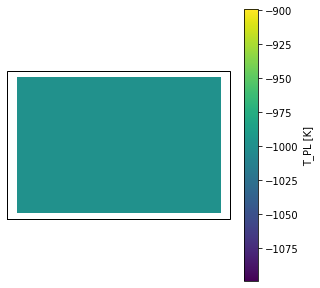

In [21]:
_,ax=plt.subplots(1,1,figsize=(5,5),subplot_kw={'projection':ccrs.PlateCarree()})
x.sel(south_north=slice(0,20),west_east=slice(25,55)).plot(ax=ax,transform=ccrs.PlateCarree())

In [28]:
pout

<xarray.Dataset>
Dimensions:  (Time: 1, num_press_levels_stag: 19, south_north: 1750, west_east: 1500)
Coordinates:
    XLAT     (Time, south_north, west_east) float32 ...
    XLONG    (Time, south_north, west_east) float32 ...
Dimensions without coordinates: Time, num_press_levels_stag, south_north, west_east
Data variables:
    Times    (Time) |S19 b'1970-01-01_00:15:36'
    Q2       (Time, south_north, west_east) float32 ...
    T2       (Time, south_north, west_east) float32 ...
    U10      (Time, south_north, west_east) float32 ...
    V10      (Time, south_north, west_east) float32 ...
    P_PL     (Time, num_press_levels_stag) float32 10000.0 20000.0 ... 100000.0
    U_PL     (Time, num_press_levels_stag, south_north, west_east) float32 ...
    V_PL     (Time, num_press_levels_stag, south_north, west_east) float32 ...
    T_PL     (Time, num_press_levels_stag, south_north, west_east) float32 ...
    RH_PL    (Time, num_press_levels_stag, south_north, west_east) float32 ...
    GHT_PL   (Time, num_press_levels_stag, south_north, west_east) float32 ...
    TD_PL    (Time, num_press_levels_stag, south_north, west_east) float32 ...
    Q_PL     (Time, num_press_levels_stag, south_north, west_east) float32 ...
Attributes:
    TITLE:                            OUTPUT FROM WRF V4.1.5 MODEL
    START_DATE:                      1970-01-01_00:07:12
    WEST-EAST_GRID_DIMENSION:        1501
    SOUTH-NORTH_GRID_DIMENSION:      1751
    BOTTOM-TOP_GRID_DIMENSION:       65
    DX:                              4000.0
    DY:                              4000.0
    AERCU_OPT:                       0
    AERCU_FCT:                       1.0
    IDEAL_CASE:                      7
    DIFF_6TH_SLOPEOPT:               0
    AUTO_LEVELS_OPT:                 2
    DIFF_6TH_THRESH:                 0.1
    DZBOT:                           50.0
    DZSTRETCH_S:                     1.3
    DZSTRETCH_U:                     1.1
    P_LEV_MISSING:                   -999.0
    GRIDTYPE:                        C
    DIFF_OPT:                        1
    KM_OPT:                          1
    DAMP_OPT:                        1
    DAMPCOEF:                        0.05
    KHDIF:                           0.0
    KVDIF:                           0.0
    MP_PHYSICS:                      8
    RA_LW_PHYSICS:                   4
    RA_SW_PHYSICS:                   4
    SF_SFCLAY_PHYSICS:               2
    SF_SURFACE_PHYSICS:              0
    BL_PBL_PHYSICS:                  2
    CU_PHYSICS:                      0
    SF_LAKE_PHYSICS:                 0
    SURFACE_INPUT_SOURCE:            3
    SST_UPDATE:                      0
    GRID_FDDA:                       0
    GFDDA_INTERVAL_M:                0
    GFDDA_END_H:                     0
    GRID_SFDDA:                      0
    SGFDDA_INTERVAL_M:               0
    SGFDDA_END_H:                    0
    HYPSOMETRIC_OPT:                 1
    USE_THETA_M:                     1
    GWD_OPT:                         0
    SF_URBAN_PHYSICS:                0
    SF_SURFACE_MOSAIC:               0
    SF_OCEAN_PHYSICS:                0
    WEST-EAST_PATCH_START_UNSTAG:    1
    WEST-EAST_PATCH_END_UNSTAG:      1500
    WEST-EAST_PATCH_START_STAG:      1
    WEST-EAST_PATCH_END_STAG:        1501
    SOUTH-NORTH_PATCH_START_UNSTAG:  1
    SOUTH-NORTH_PATCH_END_UNSTAG:    1750
    SOUTH-NORTH_PATCH_START_STAG:    1
    SOUTH-NORTH_PATCH_END_STAG:      1751
    BOTTOM-TOP_PATCH_START_UNSTAG:   1
    BOTTOM-TOP_PATCH_END_UNSTAG:     64
    BOTTOM-TOP_PATCH_START_STAG:     1
    BOTTOM-TOP_PATCH_END_STAG:       65
    GRID_ID:                         1
    PARENT_ID:                       0
    I_PARENT_START:                  0
    J_PARENT_START:                  0
    PARENT_GRID_RATIO:               1
    DT:                              24.0
    CEN_LAT:                         0.0
    CEN_LON:                         0.0
    TRUELAT1:                        0.0
    TRUELAT2:                    

In [42]:
pout.P_PL

<xarray.DataArray 'P_PL' (Time: 1, num_press_levels_stag: 19)>
array([[ 10000.,  20000.,  30000.,  35000.,  40000.,  45000.,  50000.,
         55000.,  60000.,  65000.,  70000.,  75000.,  80000.,  85000.,
         90000.,  92500.,  95000.,  97500., 100000.]], dtype=float32)
Dimensions without coordinates: Time, num_press_levels_stag
Attributes:
    FieldType:    104
    MemoryOrder:  Z  
    description:  Pressure level data, Pressure
    units:        Pa
    stagger:      Z

In [36]:
pout.U_PL.mean()

<xarray.DataArray 'U_PL' ()>
array(-945.8952, dtype=float32)

In [41]:
sout.U.mean()

<xarray.DataArray 'U' ()>
array(9.942724, dtype=float32)

In [36]:
pout2=pout2.where(pout2!=pout2.P_LEV_MISSING)

In [2]:
pout2 = xr.open_dataset("/global/homes/q/qnicolas/WRF/WRFV4/test/em_beta_plane/wrfpout_d01_0001-01-01_15:00:00",use_cftime=True)
sout2 = xr.open_dataset("/global/homes/q/qnicolas/WRF/WRFV4/test/em_beta_plane/wrfout_d01_0001-01-01_15:00:00",use_cftime=True)


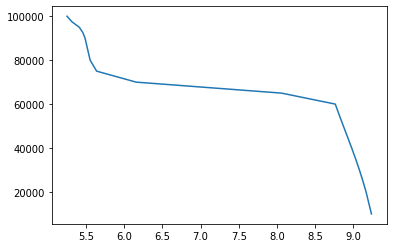

In [37]:
x=np.array(pout2.U_PL.sel(south_north=slice(0,20)).mean(["south_north","west_east"]))
plt.plot(x.reshape(-1),np.array(pout2.P_PL).reshape(-1))

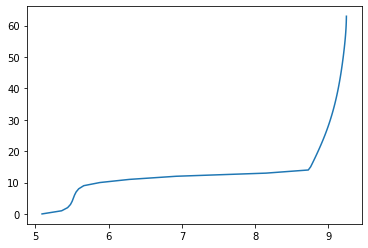

In [26]:
x=np.array(sout2.U.sel(south_north=slice(0,20)).mean(["south_north","west_east_stag"])).reshape(-1)
plt.plot(x,range(len(x)))

In [7]:
pout2

<xarray.Dataset>
Dimensions:  (Time: 1, bottom_top: 64, bottom_top_stag: 65, num_press_levels_stag: 20, south_north: 70, west_east: 80)
Coordinates:
    XLAT     (Time, south_north, west_east) float32 ...
    XLONG    (Time, south_north, west_east) float32 ...
Dimensions without coordinates: Time, bottom_top, bottom_top_stag, num_press_levels_stag, south_north, west_east
Data variables:
    Times    (Time) |S19 ...
    Q2       (Time, south_north, west_east) float32 ...
    T2       (Time, south_north, west_east) float32 ...
    U10      (Time, south_north, west_east) float32 ...
    V10      (Time, south_north, west_east) float32 ...
    P_PL     (Time, num_press_levels_stag) float32 100000.0 97500.0 ... 10000.0
    U_PL     (Time, num_press_levels_stag, south_north, west_east) float32 5.3676744 ... 8.682024
    V_PL     (Time, num_press_levels_stag, south_north, west_east) float32 ...
    T_PL     (Time, num_press_levels_stag, south_north, west_east) float32 ...
    RH_PL    (Time, num_press_levels_stag, south_north, west_east) float32 ...
    GHT_PL   (Time, num_press_levels_stag, south_north, west_east) float32 ...
    S_PL     (Time, num_press_levels_stag, south_north, west_east) float32 ...
    TD_PL    (Time, num_press_levels_stag, south_north, west_east) float32 ...
    Q_PL     (Time, num_press_levels_stag, south_north, west_east) float32 ...
    C1H      (Time, bottom_top) float32 ...
    C2H      (Time, bottom_top) float32 ...
    C1F      (Time, bottom_top_stag) float32 ...
    C2F      (Time, bottom_top_stag) float32 ...
    C3H      (Time, bottom_top) float32 ...
    C4H      (Time, bottom_top) float32 ...
    C3F      (Time, bottom_top_stag) float32 ...
    C4F      (Time, bottom_top_stag) float32 ...
Attributes:
    TITLE:                            OUTPUT FROM WRF V4.1.5 MODEL
    START_DATE:                      0001-01-01_00:00:00
    WEST-EAST_GRID_DIMENSION:        81
    SOUTH-NORTH_GRID_DIMENSION:      71
    BOTTOM-TOP_GRID_DIMENSION:       65
    DX:                              100000.0
    DY:                              100000.0
    AERCU_OPT:                       0
    AERCU_FCT:                       1.0
    IDEAL_CASE:                      7
    DIFF_6TH_SLOPEOPT:               0
    AUTO_LEVELS_OPT:                 2
    DIFF_6TH_THRESH:                 0.1
    DZBOT:                           50.0
    DZSTRETCH_S:                     1.3
    DZSTRETCH_U:                     1.1
    P_LEV_MISSING:                   -999.0
    GRIDTYPE:                        C
    DIFF_OPT:                        1
    KM_OPT:                          1
    DAMP_OPT:                        1
    DAMPCOEF:                        0.05
    KHDIF:                           0.0
    KVDIF:                           0.0
    MP_PHYSICS:                      6
    RA_LW_PHYSICS:                   4
    RA_SW_PHYSICS:                   4
    SF_SFCLAY_PHYSICS:               91
    SF_SURFACE_PHYSICS:              0
    BL_PBL_PHYSICS:                  1
    CU_PHYSICS:                      16
    SF_LAKE_PHYSICS:                 0
    SURFACE_INPUT_SOURCE:            3
    SST_UPDATE:                      0
    GRID_FDDA:                       0
    GFDDA_INTERVAL_M:                0
    GFDDA_END_H:                     0
    GRID_SFDDA:                      0
    SGFDDA_INTERVAL_M:               0
    SGFDDA_END_H:                    0
    HYPSOMETRIC_OPT:                 1
    USE_THETA_M:                     1
    GWD_OPT:                         0
    SF_URBAN_PHYSICS:                0
    SF_SURFACE_MOSAIC:               0
    SF_OCEAN_PHYSICS:                0
    WEST-EAST_PATCH_START_UNSTAG:    1
    WEST-EAST_PATCH_END_UNSTAG:      80
    WEST-EAST_PATCH_START_STAG:      1
    WEST-EAST_PATCH_END_STAG:        81
    SOUTH-NORTH_PATCH_START_UNSTAG:  1
    SOUTH-NORTH_PATCH_END_UNSTAG:    70
    SOUTH-NORTH_PATCH_START_STAG:    1
    SOUTH-NORTH_PATCH_END_STAG:      71
    BOTTOM-TOP_PATCH_START_UNSTAG:   1
    B

In [6]:
pout3 = xr.open_dataset("~/WRF/WRFV4b/test/em_beta_plane/wrfpout_d01_1970-01-01_23:00:00",use_cftime=True)
pout3=pout3.where(pout3!=pout3.P_LEV_MISSING)

/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


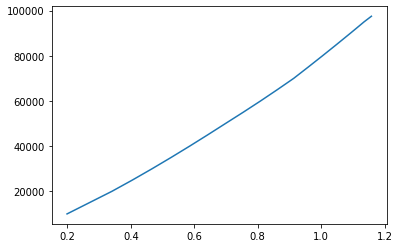

In [8]:
w=np.array(pout3.RHO_PL.sel(south_north=slice(0,20)).mean(["south_north","west_east"]))
plt.plot(w.reshape(-1),np.array(pout3.P_PL).reshape(-1))

# Check mountain 4km run

In [25]:
wrfout = xr.open_dataset("/global/cscratch1/sd/qnicolas/wrfdata/saved/channel.wrf.100x2.mountain.3km.300d/wrfout_d01_1970-01-01_00_00_00",use_cftime=True)
orog = wrfout.HGT.isel(Time=-1)
T = wrfout.T.isel(Time=-1).mean(['south_north','west_east'])
U = wrfout.U.isel(Time=-1).mean(['south_north','west_east_stag'])

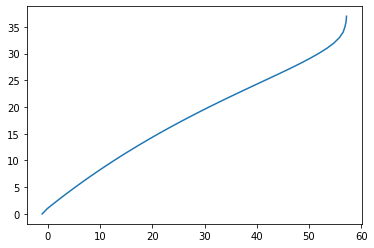

In [26]:
plt.plot(T,T.bottom_top)

In [20]:
wrfpout

<xarray.Dataset>
Dimensions:  (Time: 5, num_press_levels_stag: 30, south_north: 66, west_east: 3270)
Coordinates:
    XLAT     (Time, south_north, west_east) float32 ...
    XLONG    (Time, south_north, west_east) float32 ...
Dimensions without coordinates: Time, num_press_levels_stag, south_north, west_east
Data variables:
    Times    (Time) |S19 ...
    Q2       (Time, south_north, west_east) float32 ...
    T2       (Time, south_north, west_east) float32 ...
    U10      (Time, south_north, west_east) float32 ...
    V10      (Time, south_north, west_east) float32 ...
    RAINC    (Time, south_north, west_east) float32 ...
    RAINSH   (Time, south_north, west_east) float32 ...
    RAINNC   (Time, south_north, west_east) float32 ...
    P_PL     (Time, num_press_levels_stag) float32 ...
    U_PL     (Time, num_press_levels_stag, south_north, west_east) float32 ...
    V_PL     (Time, num_press_levels_stag, south_north, west_east) float32 ...
    W_PL     (Time, num_press_levels_stag, south_north, west_east) float32 ...
    T_PL     (Time, num_press_levels_stag, south_north, west_east) float32 ...
    RHO_PL   (Time, num_press_levels_stag, south_north, west_east) float32 ...
    RH_PL    (Time, num_press_levels_stag, south_north, west_east) float32 ...
    GHT_PL   (Time, num_press_levels_stag, south_north, west_east) float32 ...
    TD_PL    (Time, num_press_levels_stag, south_north, west_east) float32 ...
    Q_PL     (Time, num_press_levels_stag, south_north, west_east) float32 ...
Attributes:
    TITLE:                            OUTPUT FROM WRF V4.1.5 MODEL
    START_DATE:                      1970-01-01_00:00:00
    WEST-EAST_GRID_DIMENSION:        3271
    SOUTH-NORTH_GRID_DIMENSION:      67
    BOTTOM-TOP_GRID_DIMENSION:       39
    DX:                              3000.0
    DY:                              3000.0
    AERCU_OPT:                       0
    AERCU_FCT:                       1.0
    IDEAL_CASE:                      7
    DIFF_6TH_SLOPEOPT:               0
    AUTO_LEVELS_OPT:                 2
    DIFF_6TH_THRESH:                 0.1
    DZBOT:                           50.0
    DZSTRETCH_S:                     1.3
    DZSTRETCH_U:                     1.1
    P_LEV_MISSING:                   -999.0
    GRIDTYPE:                        C
    DIFF_OPT:                        1
    KM_OPT:                          1
    DAMP_OPT:                        1
    DAMPCOEF:                        0.05
    KHDIF:                           0.0
    KVDIF:                           0.0
    MP_PHYSICS:                      8
    RA_LW_PHYSICS:                   24
    RA_SW_PHYSICS:                   24
    SF_SFCLAY_PHYSICS:               2
    SF_SURFACE_PHYSICS:              4
    BL_PBL_PHYSICS:                  2
    CU_PHYSICS:                      0
    SF_LAKE_PHYSICS:                 0
    SURFACE_INPUT_SOURCE:            3
    SST_UPDATE:                      0
    GRID_FDDA:                       0
    GFDDA_INTERVAL_M:                0
    GFDDA_END_H:                     0
    GRID_SFDDA:                      0
    SGFDDA_INTERVAL_M:               0
    SGFDDA_END_H:                    0
    HYPSOMETRIC_OPT:                 1
    USE_THETA_M:                     1
    GWD_OPT:                         0
    SF_URBAN_PHYSICS:                0
    SF_SURFACE_MOSAIC:               0
    SF_OCEAN_PHYSICS:                0
    WEST-EAST_PATCH_START_UNSTAG:    1
    WEST-EAST_PATCH_END_UNSTAG:      3270
    WEST-EAST_PATCH_START_STAG:      1
    WEST-EAST_PATCH_END_STAG:        3271
    SOUTH-NORTH_PATCH_START_UNSTAG:  1
    SOUTH-NORTH_PATCH_END_UNSTAG:    66
    SOUTH-NORTH_PATCH_START_STAG:    1
    SOUTH-NORTH_PATCH_END_STAG:      67
    BOTTOM-TOP_PATCH_START_UNSTAG:   1
    BOTTOM-TOP_PATCH_END_UNSTAG:     38
    BOTTOM-TOP_PATCH_START_STAG:     1
    BOTTOM-TOP_PATCH_END_STAG:       39
    GRID_ID:                         1
    PARENT_ID:                       0
    I_PARENT_START:                  0


In [33]:
wrfpout = xr.open_dataset("/global/cscratch1/sd/qnicolas/wrfdata/saved/channel.wrf.100x2.mountain.3km.300d/wrfpout_d01_1970-01-01_00_00_00",use_cftime=True)
T = wrfpout.T_PL.isel(Time=0).mean(['south_north','west_east'])
Q = wrfpout.Q_PL.isel(Time=0).mean(['south_north','west_east'])
W = wrfpout.W_PL.isel(Time=-1).mean(['south_north','west_east'])

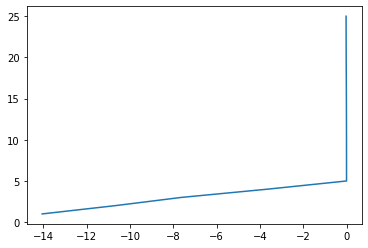

In [34]:
plt.plot(W[1:-4],W.num_press_levels_stag[1:-4])

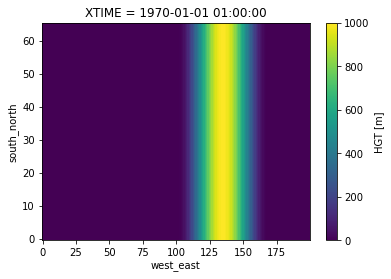

In [11]:
orog.isel(west_east=slice(1500,1700)).plot()

In [46]:
dl=10
grid = xr.DataArray(np.zeros((int(np.ceil(1750/dl)),int(np.ceil(1500/dl)))),
                        dims=["south_north","west_east"],
                        coords={"south_north": np.arange(0,1749,dl), "west_east": np.arange(0,1499,dl)},
                    )
orog=orog.interp_like(grid)

1.189802885055542


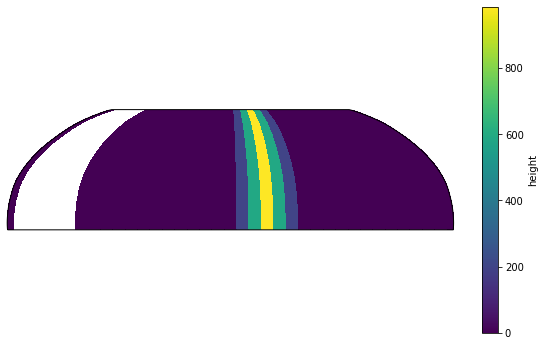

In [50]:

t=time.time()
fig, ax = plt.subplots(1,1,figsize=(10,6),subplot_kw={'projection': ccrs.Robinson()})
orog.sel(south_north=slice(0,700),west_east=slice(600,900)).plot(ax=ax,transform=ccrs.PlateCarree(),cbar_kwargs={"label":"height"})#,"ticks":np.arange(-0.02,0.021,0.004)},levels=np.linspace(0,40.,100))
print(time.time()-t)

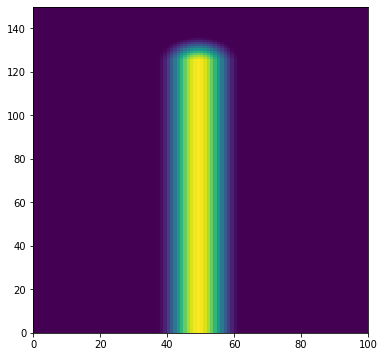

In [54]:

t=time.time()
fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.pcolor(orogarr[0:150,700:800])

# Check wrfinput 

## test

In [2]:
wrfinput=xr.open_dataset("/global/cscratch1/sd/qnicolas/WRF/WRFV4_bp_crosseq/test/em_beta_plane/wrfinput_d01")

In [3]:
wrfinput

<xarray.Dataset>
Dimensions:               (DIM0010: 5, Time: 1, bottom_top: 38, bottom_top_stag: 39, crop_types_stag: 5, dust_erosion_dimension: 3, land_cat_stag: 21, num_ext_model_couple_dom_stag: 1, snow_layers_stag: 3, snso_layers_stag: 7, soil_cat_stag: 16, soil_composition_layers_stag: 8, soil_layers_stag: 4, south_north: 140, south_north_stag: 141, west_east: 80, west_east_stag: 81)
Coordinates:
    XLAT                  (Time, south_north, west_east) float32 ...
    XLONG                 (Time, south_north, west_east) float32 ...
    XLAT_U                (Time, south_north, west_east_stag) float32 ...
    XLONG_U               (Time, south_north, west_east_stag) float32 ...
    XLAT_V                (Time, south_north_stag, west_east) float32 ...
    XLONG_V               (Time, south_north_stag, west_east) float32 ...
Dimensions without coordinates: DIM0010, Time, bottom_top, bottom_top_stag, crop_types_stag, dust_erosion_dimension, land_cat_stag, num_ext_model_couple_dom_stag, snow_layers_stag, snso_layers_stag, soil_cat_stag, soil_composition_layers_stag, soil_layers_stag, south_north, south_north_stag, west_east, west_east_stag
Data variables:
    Times                 (Time) |S19 ...
    LU_INDEX              (Time, south_north, west_east) float32 ...
    ZNU                   (Time, bottom_top) float32 ...
    ZNW                   (Time, bottom_top_stag) float32 ...
    ZS                    (Time, soil_layers_stag) float32 ...
    DZS                   (Time, soil_layers_stag) float32 ...
    VAR_SSO               (Time, south_north, west_east) float32 ...
    EROD                  (Time, dust_erosion_dimension, south_north, west_east) float32 ...
    U                     (Time, bottom_top, south_north, west_east_stag) float32 ...
    V                     (Time, bottom_top, south_north_stag, west_east) float32 ...
    W                     (Time, bottom_top_stag, south_north, west_east) float32 ...
    PH                    (Time, bottom_top_stag, south_north, west_east) float32 ...
    PHB                   (Time, bottom_top_stag, south_north, west_east) float32 ...
    T                     (Time, bottom_top, south_north, west_east) float32 ...
    THM                   (Time, bottom_top, south_north, west_east) float32 ...
    T_INIT                (Time, bottom_top, south_north, west_east) float32 ...
    MU                    (Time, south_north, west_east) float32 ...
    MUB                   (Time, south_north, west_east) float32 ...
    P                     (Time, bottom_top, south_north, west_east) float32 ...
    AL                    (Time, bottom_top, south_north, west_east) float32 ...
    ALB                   (Time, bottom_top, south_north, west_east) float32 ...
    PB                    (Time, bottom_top, south_north, west_east) float32 ...
    FNM                   (Time, bottom_top) float32 ...
    FNP                   (Time, bottom_top) float32 ...
    RDNW                  (Time, bottom_top) float32 ...
    RDN                   (Time, bottom_top) float32 ...
    DNW                   (Time, bottom_top) float32 ...
    DN                    (Time, bottom_top) float32 ...
    T_BASE                (Time, bottom_top) float32 ...
    CFN                   (Time) float32 ...
    CFN1                  (Time) float32 ...
    STEP_NUMBER           (Time) int32 ...
    THIS_IS_AN_IDEAL_RUN  (Time) int32 ...
    P_HYD                 (Time, bottom_top, south_north, west_east) float32 ...
    Q2                    (Time, south_north, west_east) float32 ...
    T2                    (Time, south_north, west_east) float32 ...
    TH2                   (Time, south_north, west_east) float32 ...
    PSFC                  (Time, south_north, west_east) float32 ...
    U10                   (Time, south_north, west_east) float32 ...
    V10                   (Time, south_north, west_east) float32 ...
    RDX                   (Time) float32 ...
    RDY                   (Time) float32 ...
    DTS     

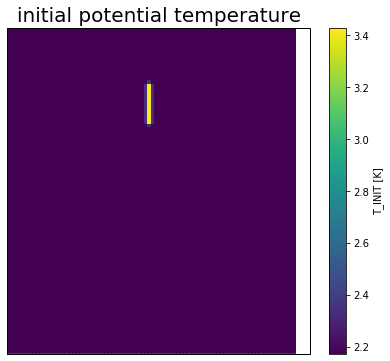

In [9]:
plot_2dvar(wrfinput.T_INIT.isel(bottom_top=10))#.QVAPOR.isel(bottom_top=10))#_stag

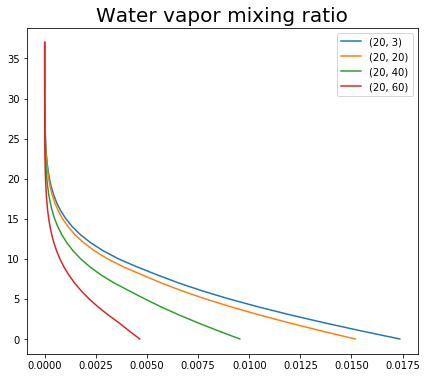

In [6]:
plot_randomvvars(wrfinput.QVAPOR)#.rename({'south_north_stag':'south_north'})#.rename({'west_east_stag':'west_east'})

Text(0.5, 1.0, 't_init : test')

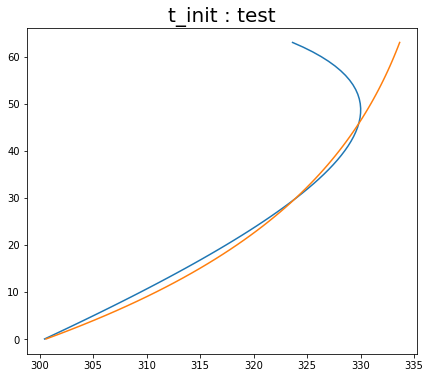

In [47]:
pb = wrfinput.PB.isel(south_north=10,west_east=10)
sst = 300
temp = (sst - (6.5/1000.) * (287*sst/9.81)*xr.ufuncs.log(100000./pb))
#temp = ((pb > 20000)*(sst - (6.5/1000.) * (287*sst/9.81)*xr.ufuncs.log(100000./pb)) + 
#        (pb <= 20000)*(sst - (6.5/1000.) * (287*sst/9.81)*xr.ufuncs.log(100000./20000) - (4/1000.) * (287*sst/9.81)*xr.ufuncs.log(20000./pb))
#       )
tinit = temp*(100000/pb)**(2/7)
tinit.attrs['description'] = "t_init : test"

tinit2 = sst+37*((100000-pb)/100000)

var=tinit
fig, ax = plt.subplots(1,1,figsize=(7,6))
ax.plot(var.isel(Time=0),var.bottom_top)
ax.plot(tinit2.isel(Time=0),tinit2.bottom_top)
ax.set_title(var.description,fontsize=20)

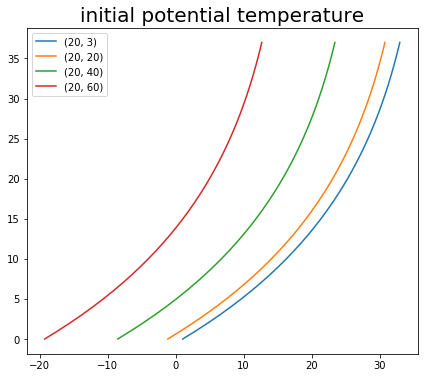

In [7]:
plot_randomvvars(wrfinput.T_INIT)#.rename({'south_north_stag':'south_north'})#.rename({'west_east_stag':'west_east'})

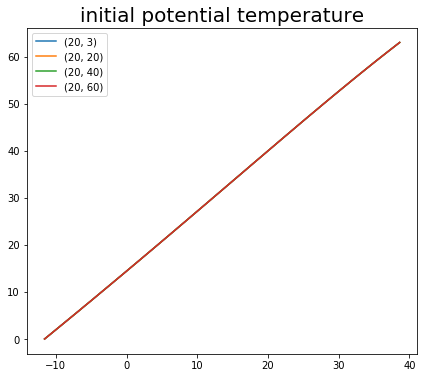

In [19]:
wrfinput2=xr.open_dataset("/global/homes/q/qnicolas/WRF/WRFV4/test/em_beta_plane/wrfinput_d01")
plot_randomvvars(wrfinput2.T_INIT)

In [10]:
sw_toa

<xarray.DataArray 'SWDNT' (Time: 5, south_north: 70, west_east: 80)>
array([[[  0.     ,   0.     , ...,   0.     ,   0.     ],
        [  0.     ,   0.     , ...,   0.     ,   0.     ],
        ...,
        [  0.     ,   0.     , ...,   0.     ,   0.     ],
        [  0.     ,   0.     , ...,   0.     ,   0.     ]],

       [[451.30573, 451.30573, ..., 451.30573, 451.30573],
        [451.10538, 451.10538, ..., 451.10538, 451.10538],
        ...,
        [168.98274, 168.98274, ..., 168.98274, 168.98274],
        [161.7574 , 161.7574 , ..., 161.7574 , 161.7574 ]],

       ...,

       [[451.30978, 451.30978, ..., 451.30978, 451.30978],
        [451.10953, 451.10953, ..., 451.10953, 451.10953],
        ...,
        [168.98436, 168.98436, ..., 168.98436, 168.98436],
        [161.75888, 161.75888, ..., 161.75888, 161.75888]],

       [[451.3115 , 451.3115 , ..., 451.3115 , 451.3115 ],
        [451.11102, 451.11105, ..., 451.11102, 451.11105],
        ...,
        [168.98494, 168.98494, ..., 168.98494, 168.98494],
        [161.75954, 161.75952, ..., 161.75952, 161.75952]]], dtype=float32)
Coordinates:
    XLAT     (Time, south_north, west_east) float32 ...
    XLONG    (Time, south_north, west_east) float32 ...
    XTIME    (Time) datetime64[ns] ...
Dimensions without coordinates: Time, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  INSTANTANEOUS DOWNWELLING SHORTWAVE FLUX AT TOP
    units:        W m-2
    stagger:

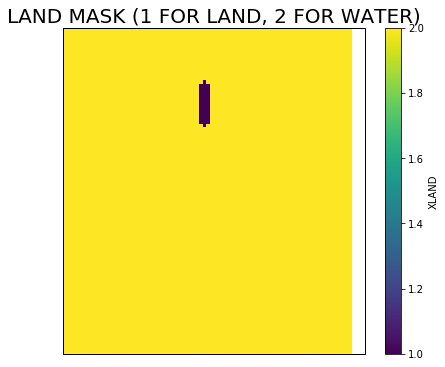

In [10]:
plot_2dvar(wrfinput.XLAND)#.sel(south_north=slice(0,6),west_east=slice(37,42)))#

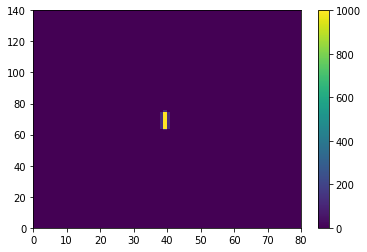

In [7]:
test = np.array(wrfinput.HGT.isel(Time=0))
_,ax=plt.subplots(1,1)
c = ax.pcolormesh(test)
plt.colorbar(c)

In [12]:
wrfout=xr.open_mfdataset(sorted(glob.glob("/global/cscratch1/sd/qnicolas/WRF/WRFV4_bp_crosseq/test/em_beta_plane/wrfout_d01_1970-*")),combine="nested",concat_dim='Time')


In [18]:
wrfout

<xarray.Dataset>
Dimensions:               (Time: 361, bottom_top: 38, bottom_top_stag: 39, snow_layers_stag: 3, snso_layers_stag: 7, south_north: 140, south_north_stag: 141, west_east: 80, west_east_stag: 81)
Coordinates:
    XLAT                  (Time, south_north, west_east) float32 dask.array<chunksize=(40, 140, 80), meta=np.ndarray>
    XLONG                 (Time, south_north, west_east) float32 dask.array<chunksize=(40, 140, 80), meta=np.ndarray>
    XTIME                 (Time) datetime64[ns] dask.array<chunksize=(40,), meta=np.ndarray>
    XLAT_U                (Time, south_north, west_east_stag) float32 dask.array<chunksize=(40, 140, 81), meta=np.ndarray>
    XLONG_U               (Time, south_north, west_east_stag) float32 dask.array<chunksize=(40, 140, 81), meta=np.ndarray>
    XLAT_V                (Time, south_north_stag, west_east) float32 dask.array<chunksize=(40, 141, 80), meta=np.ndarray>
    XLONG_V               (Time, south_north_stag, west_east) float32 dask.array<chunksize=(40, 141, 80), meta=np.ndarray>
Dimensions without coordinates: Time, bottom_top, bottom_top_stag, snow_layers_stag, snso_layers_stag, south_north, south_north_stag, west_east, west_east_stag
Data variables:
    Times                 (Time) |S19 dask.array<chunksize=(40,), meta=np.ndarray>
    LU_INDEX              (Time, south_north, west_east) float32 dask.array<chunksize=(40, 140, 80), meta=np.ndarray>
    ZNU                   (Time, bottom_top) float32 dask.array<chunksize=(40, 38), meta=np.ndarray>
    ZNW                   (Time, bottom_top_stag) float32 dask.array<chunksize=(40, 39), meta=np.ndarray>
    U                     (Time, bottom_top, south_north, west_east_stag) float32 dask.array<chunksize=(40, 38, 140, 81), meta=np.ndarray>
    V                     (Time, bottom_top, south_north_stag, west_east) float32 dask.array<chunksize=(40, 38, 141, 80), meta=np.ndarray>
    W                     (Time, bottom_top_stag, south_north, west_east) float32 dask.array<chunksize=(40, 39, 140, 80), meta=np.ndarray>
    PH                    (Time, bottom_top_stag, south_north, west_east) float32 dask.array<chunksize=(40, 39, 140, 80), meta=np.ndarray>
    PHB                   (Time, bottom_top_stag, south_north, west_east) float32 dask.array<chunksize=(40, 39, 140, 80), meta=np.ndarray>
    T                     (Time, bottom_top, south_north, west_east) float32 dask.array<chunksize=(40, 38, 140, 80), meta=np.ndarray>
    THM                   (Time, bottom_top, south_north, west_east) float32 dask.array<chunksize=(40, 38, 140, 80), meta=np.ndarray>
    MU                    (Time, south_north, west_east) float32 dask.array<chunksize=(40, 140, 80), meta=np.ndarray>
    MUB                   (Time, south_north, west_east) float32 dask.array<chunksize=(40, 140, 80), meta=np.ndarray>
    P                     (Time, bottom_top, south_north, west_east) float32 dask.array<chunksize=(40, 38, 140, 80), meta=np.ndarray>
    PB                    (Time, bottom_top, south_north, west_east) float32 dask.array<chunksize=(40, 38, 140, 80), meta=np.ndarray>
    RHO                   (Time, bottom_top, south_north, west_east) float32 dask.array<chunksize=(40, 38, 140, 80), meta=np.ndarray>
    THIS_IS_AN_IDEAL_RUN  (Time) int32 dask.array<chunksize=(40,), meta=np.ndarray>
    P_HYD                 (Time, bottom_top, south_north, west_east) float32 dask.array<chunksize=(40, 38, 140, 80), meta=np.ndarray>
    Q2                    (Time, south_north, west_east) float32 dask.array<chunksize=(40, 140, 80), meta=np.ndarray>
    T2                    (Time, south_north, west_east) float32 dask.array<chunksize=(40, 140, 80), meta=np.ndarray>
    TH2                   (Time, south_north, west_east) float32 dask.array<chunksize=(40, 140, 80), meta=np.ndarray>
    PSFC                  (Time, south_north, west_east) float32 dask.array<chunksize=(40, 140, 80), meta=np.ndarray>
    U10                   (Time, south_north, west_east) float32 dask.array<chunk

In [29]:
def plot_2dvar(var):
    _,ax=plt.subplots(1,1)
    c = ax.pcolormesh(np.array(var))
    plt.colorbar(c)
    
def plot_2dvar_z(var):
    _,ax=plt.subplots(1,1)
    tmp = var.mean(["west_east"])
    ax.plot(tmp.south_north,tmp)


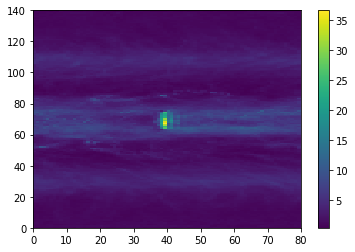

In [30]:
rain = (wrfout.RAINC+wrfout.RAINNC).diff('Time').mean("Time")*4
plot_2dvar(rain)


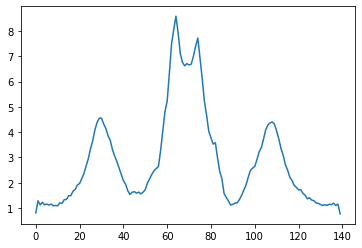

In [31]:
plot_2dvar_z(rain)


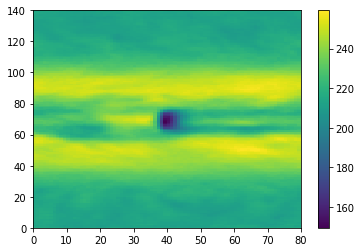

In [32]:
olr = (wrfout.OLR).mean("Time")
plot_2dvar(olr)


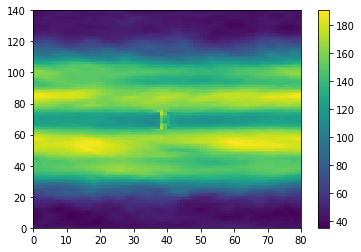

In [34]:
olr = (wrfout.HFX+wrfout.LH).mean("Time")
plot_2dvar(olr)

In [40]:
wrfout_noUSGS=xr.open_mfdataset(sorted(glob.glob("/global/cscratch1/sd/qnicolas/wrfdata/saved/wrf.mountain.100km.1000d/wrf.mountain.100km.1000d.4.nc_orig")),combine="nested",concat_dim='Time')


/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


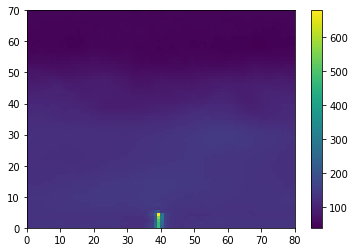

In [41]:
olr = (wrfout_noUSGS.HFX+wrfout_noUSGS.LH).mean("Time")
plot_2dvar(olr)

# Check mountains bis

In [38]:
wrfinput=xr.open_dataset("/global/cscratch1/sd/qnicolas/WRF/WRFV4control4km/test/em_beta_plane/wrfinput_d01")

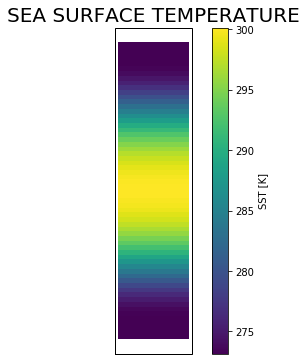

In [41]:
plot_2dvar(wrfinput.SST[:,::40,::40])#.isel(bottom_top=10)

In [56]:
print(1)

1


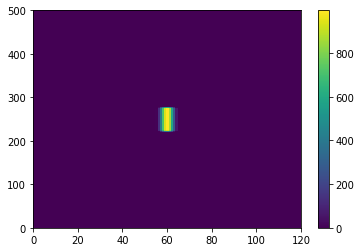

In [58]:
test = np.array(wrfinput.HGT[:,::5,::5].isel(Time=0))
_,ax=plt.subplots(1,1)
c = ax.pcolormesh(test)
plt.colorbar(c)

In [26]:
wrfinput.HGT[:,1000:1500:3,250:350:3].west_east

<xarray.DataArray 'west_east' (west_east: 34)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])
Dimensions without coordinates: west_east

In [11]:
wrfinput.T_INIT.isel(bottom_top=10)

<xarray.DataArray 'T_INIT' (Time: 1, south_north: 2500, west_east: 600)>
[1500000 values with dtype=float32]
Coordinates:
    XLAT     (Time, south_north, west_east) float32 ...
    XLONG    (Time, south_north, west_east) float32 ...
Dimensions without coordinates: Time, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XYZ
    description:  initial potential temperature
    units:        K
    stagger:      
    coordinates:  XLONG XLAT XTIME

# Check surface fluxes

In [6]:
wrfout=xr.open_dataset("/global/cscratch1/sd/qnicolas/wrfdata/saved/wrf.mountain.100km.1000d/wrf.mountain.100km.1000d.4.nc_orig")


/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [7]:
wrfout

/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


<xarray.Dataset>
Dimensions:                (Time: 800, bottom_top: 64, bottom_top_stag: 65, seed_dim_stag: 2, soil_layers_stag: 5, south_north: 70, south_north_stag: 71, west_east: 80, west_east_stag: 81)
Coordinates:
    XLAT                   (Time, south_north, west_east) float32 ...
    XLONG                  (Time, south_north, west_east) float32 ...
    XTIME                  (Time) object ...
    XLAT_U                 (Time, south_north, west_east_stag) float32 ...
    XLONG_U                (Time, south_north, west_east_stag) float32 ...
    XLAT_V                 (Time, south_north_stag, west_east) float32 ...
    XLONG_V                (Time, south_north_stag, west_east) float32 ...
Dimensions without coordinates: Time, bottom_top, bottom_top_stag, seed_dim_stag, soil_layers_stag, south_north, south_north_stag, west_east, west_east_stag
Data variables:
    Times                  (Time) |S19 ...
    LU_INDEX               (Time, south_north, west_east) float32 ...
    ZNU                    (Time, bottom_top) float32 ...
    ZNW                    (Time, bottom_top_stag) float32 ...
    ZS                     (Time, soil_layers_stag) float32 ...
    DZS                    (Time, soil_layers_stag) float32 ...
    VAR_SSO                (Time, south_north, west_east) float32 ...
    U                      (Time, bottom_top, south_north, west_east_stag) float32 ...
    V                      (Time, bottom_top, south_north_stag, west_east) float32 ...
    W                      (Time, bottom_top_stag, south_north, west_east) float32 ...
    PH                     (Time, bottom_top_stag, south_north, west_east) float32 ...
    PHB                    (Time, bottom_top_stag, south_north, west_east) float32 ...
    T                      (Time, bottom_top, south_north, west_east) float32 ...
    THM                    (Time, bottom_top, south_north, west_east) float32 ...
    HFX_FORCE              (Time) float32 ...
    LH_FORCE               (Time) float32 ...
    TSK_FORCE              (Time) float32 ...
    HFX_FORCE_TEND         (Time) float32 ...
    LH_FORCE_TEND          (Time) float32 ...
    TSK_FORCE_TEND         (Time) float32 ...
    MU                     (Time, south_north, west_east) float32 ...
    MUB                    (Time, south_north, west_east) float32 ...
    NEST_POS               (Time, south_north, west_east) float32 ...
    P                      (Time, bottom_top, south_north, west_east) float32 ...
    PB                     (Time, bottom_top, south_north, west_east) float32 ...
    FNM                    (Time, bottom_top) float32 ...
    FNP                    (Time, bottom_top) float32 ...
    RDNW                   (Time, bottom_top) float32 ...
    RDN                    (Time, bottom_top) float32 ...
    DNW                    (Time, bottom_top) float32 ...
    DN                     (Time, bottom_top) float32 ...
    CFN                    (Time) float32 ...
    CFN1                   (Time) float32 ...
    THIS_IS_AN_IDEAL_RUN   (Time) int32 ...
    P_HYD                  (Time, bottom_top, south_north, west_east) float32 ...
    Q2                     (Time, south_north, west_east) float32 ...
    T2                     (Time, south_north, west_east) float32 ...
    TH2                    (Time, south_north, west_east) float32 ...
    PSFC                   (Time, south_north, west_east) float32 ...
    U10                    (Time, south_north, west_east) float32 ...
    V10                    (Time, south_north, west_east) float32 ...
    RDX                    (Time) float32 ...
    RDY                    (Time) float32 ...
    RESM                   (Time) float32 ...
    ZETATOP                (Time) float32 ...
    CF1                    (Time) float32 ...
    CF2                    (Time) float32 ...
    CF3                    (Time) float32 ...
    ITIMESTEP              (Time) int32 ...
    QVAPOR                 (Time, bottom_top, south_north, west_east) float32 ...
    QCLO

In [24]:
wrfout.HFX

<xarray.DataArray 'HFX' (Time: 800, south_north: 70, west_east: 80)>
[4480000 values with dtype=float32]
Coordinates:
    XLAT     (Time, south_north, west_east) float32 ...
    XLONG    (Time, south_north, west_east) float32 ...
    XTIME    (Time) object 0002-08-24 00:00:00 ... 0003-03-11 18:00:00
Dimensions without coordinates: Time, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  UPWARD HEAT FLUX AT THE SURFACE
    units:        W m-2
    stagger:

In [32]:
def plot_2dvarmean(var,ax):
    var[::20].mean("Time").plot(ax=ax,transform=ccrs.PlateCarree(),cbar_kwargs={'shrink':0.5})
    ax.set_title(var.description+" "+var.units,fontsize=12)

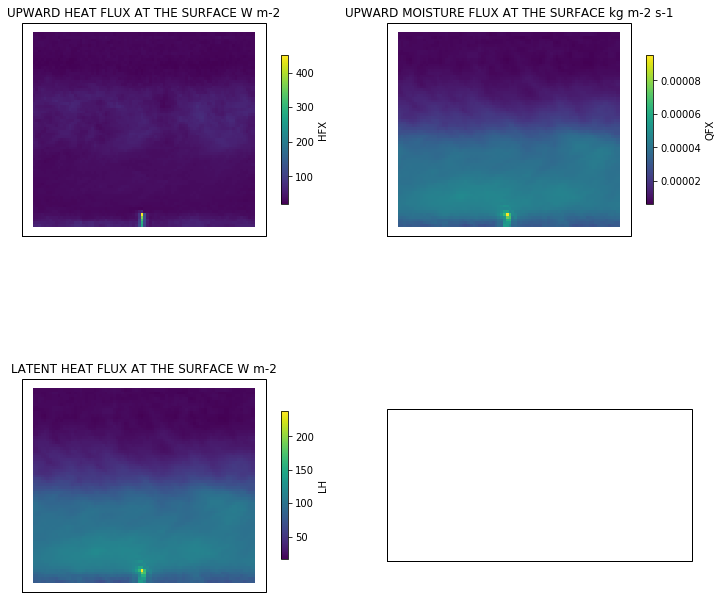

In [35]:
fig, ax = plt.subplots(2,2,figsize=(12,12),subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.reshape(-1)

SH=(wrfout.HFX[::20].mean("Time")-wrfout.LH[::20].mean("Time"))

plot_2dvarmean(wrfout.HFX,ax[0])
plot_2dvarmean(wrfout.QFX,ax[1])
plot_2dvarmean(wrfout.LH ,ax[2])


# Check sigma levels

In [3]:
wrfout=xr.open_dataset("/global/cscratch1/sd/qnicolas/wrfdata/saved/new.wrf.mountain.100km.1000d/wrfout_d01_1970-01-01_00_00_00")


In [25]:
for i,var in enumerate(wrfout.variables):
    if i>0:
        print(var,wrfout[var].attrs['description'])
    

XLAT LATITUDE, SOUTH IS NEGATIVE
XLONG LONGITUDE, WEST IS NEGATIVE
LU_INDEX LAND USE CATEGORY
ZNU eta values on half (mass) levels
ZNW eta values on full (w) levels
U x-wind component
V y-wind component
W z-wind component
PH perturbation geopotential
PHB base-state geopotential
T perturbation potential temperature theta-t0
THM either 1) pert moist pot temp=(1+Rv/Rd Qv)*(theta)-T0, or 2) pert dry pot temp=t
MU perturbation dry air mass in column
MUB base state dry air mass in column
P perturbation pressure
PB BASE STATE PRESSURE
RHO DENSITY
THIS_IS_AN_IDEAL_RUN T/F flag: this is an ARW ideal simulation
P_HYD hydrostatic pressure
Q2 QV at 2 M
T2 TEMP at 2 M
TH2 POT TEMP at 2 M
PSFC SFC PRESSURE
U10 U at 10 M
V10 V at 10 M
RDX INVERSE X GRID LENGTH
RDY INVERSE Y GRID LENGTH
ZETATOP ZETA AT MODEL TOP
ITIMESTEP 
XTIME minutes since 1970-01-01 00:00:00
QVAPOR Water vapor mixing ratio
QCLOUD Cloud water mixing ratio
QRAIN Rain water mixing ratio
QICE Ice mixing ratio
QSNOW Snow mixing ratio
Q

In [27]:
wrfout.ZNW

<xarray.DataArray 'ZNW' (Time: 40, bottom_top_stag: 39)>
array([[1.      , 0.940705, 0.88445 , ..., 0.017374, 0.008458, 0.      ],
       [1.      , 0.940705, 0.88445 , ..., 0.017374, 0.008458, 0.      ],
       [1.      , 0.940705, 0.88445 , ..., 0.017374, 0.008458, 0.      ],
       ...,
       [1.      , 0.940705, 0.88445 , ..., 0.017374, 0.008458, 0.      ],
       [1.      , 0.940705, 0.88445 , ..., 0.017374, 0.008458, 0.      ],
       [1.      , 0.940705, 0.88445 , ..., 0.017374, 0.008458, 0.      ]],
      dtype=float32)
Coordinates:
    XTIME    (Time) datetime64[ns] 1970-01-01 ... 1970-01-10T18:00:00
Dimensions without coordinates: Time, bottom_top_stag
Attributes:
    FieldType:    104
    MemoryOrder:  Z  
    description:  eta values on full (w) levels
    units:        
    stagger:      Z

# USGS vs aq differences

In [6]:
test_USGS=xr.open_dataset(sorted(glob.glob("/global/cscratch1/sd/qnicolas/WRF/USGSbckup/wrfout_d01_1970-*"))[5])
test_aq=xr.open_dataset(sorted(glob.glob("/global/cscratch1/sd/qnicolas/wrfdata/saved/new.wrf.crosseq.aquaplanet.100km.300d/wrfout_d01_1970-*"))[5])


In [49]:
def plot_1dvar(var):
    _,ax=plt.subplots(1,1,figsize=(7,5))
    try:
        ax.plot(var.south_north,var)
    except AttributeError:
        ax.plot(var.south_north_stag,var)
    ax.set_title(var.name)

In [61]:
vU.max()

<xarray.DataArray 'SST_INPUT' ()>
array(0., dtype=float32)

In [65]:
def clip(x):
    a = np.max(np.abs(x))
    return np.sign(x)*np.maximum(np.abs(x),0.01*a)


In [ ]:
i=0
for var in test_USGS.variables:
    if ('south_north' in test_USGS[var].dims or 'south_north_stag' in test_USGS[var].dims)  and ('west_east' in test_USGS[var].dims or 'west_east_stag' in test_USGS[var].dims):
        if 'bottom_top' in test_USGS[var].dims or 'bottom_top_stag' in test_USGS[var].dims :
            try :
                vU = test_USGS[var].isel(bottom_top=0).mean("Time")
                try :
                    vA = test_aq[var].isel(bottom_top=0).mean("Time")
                except KeyError:
                    print(var)
                    continue
            except ValueError :
                vU = test_USGS[var].isel(bottom_top_stag=0).mean("Time")
                try :
                    vA = test_aq[var].isel(bottom_top_stag=0).mean("Time")
                except KeyError:
                    print(var)
                    continue
        else : 
            vU = test_USGS[var].mean("Time")
            try:
                vA = test_aq[var].mean("Time")
            except KeyError:
                print(var)
                continue
        if len(vU.dims) == 2:
            try :
                vUm = vU.mean("west_east")
                vpct = 100*((vA.mean("west_east")-vUm)/clip(vUm))
            except ValueError:
                pass
                #vUm = vU.mean("west_east_stag")
                #vpct = 100*((vA.mean("west_east_stag")/xr.ufuncs.maximum(0.01*vUm.max(),vUm))-1)
            plot_1dvar(vpct)
            



In [27]:
test_USGS['U'].bottom_top

<xarray.DataArray 'bottom_top' (bottom_top: 64)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63])
Dimensions without coordinates: bottom_top

In [126]:
test_USGS=xr.open_mfdataset(sorted(glob.glob("/global/cscratch1/sd/qnicolas/WRF/USGS_65_100/wrfout_d01_1970-*"))[-15:],combine="nested",concat_dim="Time")
test_aq=xr.open_mfdataset(sorted(glob.glob("/global/cscratch1/sd/qnicolas/wrfdata/saved/new.wrf.crosseq.aquaplanet.100km.300d/wrfout_d01_1970-*"))[-15:],combine="nested",concat_dim="Time")
test_USGSnew=xr.open_mfdataset(sorted(glob.glob("/global/cscratch1/sd/qnicolas/WRF/USGS_39_180/wrfout_d01_1970-*"))[-15:],combine="nested",concat_dim="Time")


In [127]:
test_USGS_mean=test_USGS.mean(["west_east",'Time'])
test_aq_mean=test_aq.mean(["west_east",'Time'])
test_USGS_meant=test_USGS.mean(['Time'])
test_aq_meant=test_aq.mean(['Time'])

test_USGSnew_mean=test_USGSnew.mean(["west_east",'Time'])
test_USGSnew_meant=test_USGSnew.mean(['Time'])

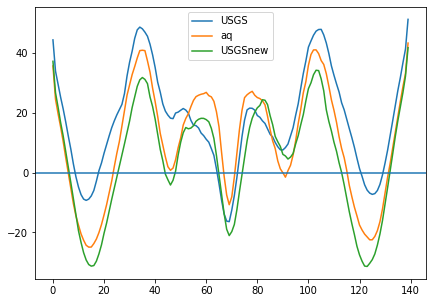

In [128]:
_,ax=plt.subplots(1,1,figsize=(7,5))

ax.plot(-test_USGS_mean.SWDNB-test_USGS_mean.LWDNB+test_USGS_mean.SWUPB+test_USGS_mean.LWUPB+test_USGS_mean.HFX+test_USGS_mean.LH,label="USGS")     # + down SW - up LW - up SW - hfx-LH
ax.plot(-test_aq_mean.SWDNB-test_aq_mean.LWDNB+test_aq_mean.SWUPB+test_aq_mean.LWUPB+test_aq_mean.HFX+test_aq_mean.LH,label="aq")     # + down SW - up LW - up SW - hfx-LH
ax.plot(-test_USGSnew_mean.SWDNB-test_USGSnew_mean.LWDNB+test_USGSnew_mean.SWUPB+test_USGSnew_mean.LWUPB+test_USGSnew_mean.HFX+test_USGSnew_mean.LH,label="USGSnew")     # + down SW - up LW - up SW - hfx-LH

ax.legend()
ax.axhline(0.)

In [123]:
def plot_2dvar(var,ax,scale=60.):
    c = ax.pcolormesh(np.array(var),cmap=plt.cm.RdBu_r,vmin=-scale,vmax=scale)
    plt.colorbar(c,ax=ax)
    ax.set_title(var.name)

Text(0.5, 1.0, 'aquaplanet, after Git tracking')

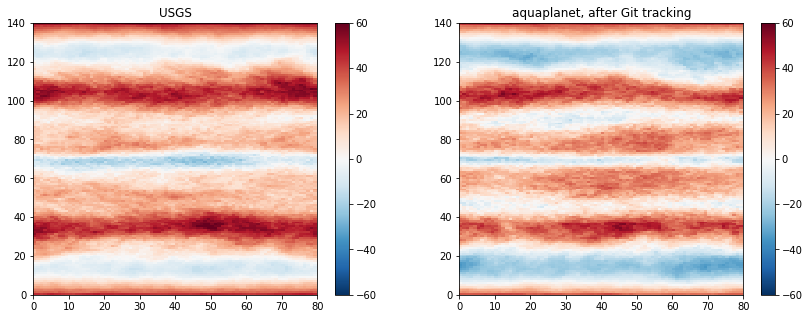

In [117]:
_,ax=plt.subplots(1,2,figsize=(14,5))
plot_2dvar(-test_USGS_meant.SWDNB-test_USGS_meant.LWDNB+test_USGS_meant.SWUPB+test_USGS_meant.LWUPB+test_USGS_meant.HFX+test_USGS_meant.LH,ax[0])
plot_2dvar(-test_aq_meant.SWDNB-test_aq_meant.LWDNB+test_aq_meant.SWUPB+test_aq_meant.LWUPB+test_aq_meant.HFX+test_aq_meant.LH,ax[1])
ax[0].set_title('USGS')
ax[1].set_title('aquaplanet, after Git tracking')

In [110]:
test_mt=xr.open_mfdataset(sorted(glob.glob("/global/cscratch1/sd/qnicolas/wrfdata/saved/new.wrf.crosseq.mountain.100km.300d/wrfout_d01_1970-*"))[-15:],combine="nested",concat_dim="Time")
test_mt_meant=test_mt.mean(['Time'])

test_ft=xr.open_mfdataset(sorted(glob.glob("/global/cscratch1/sd/qnicolas/wrfdata/saved/new.wrf.crosseq.flatisland.100km.300d/wrfout_d01_1970-*"))[-15:],combine="nested",concat_dim="Time")
test_ft_meant=test_ft.mean(['Time'])

Text(0.5, 1.0, 'flat island, after Git tracking')

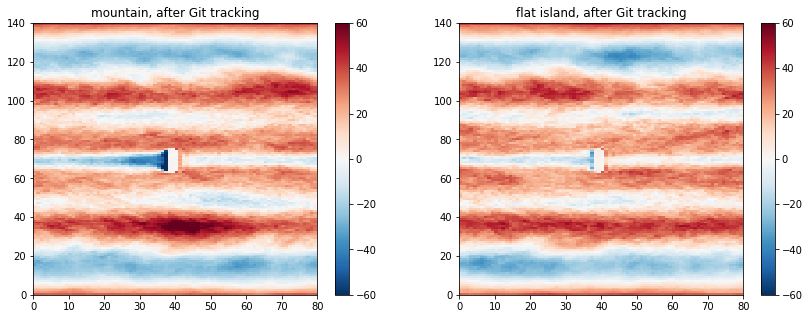

In [118]:
_,ax=plt.subplots(1,2,figsize=(14,5))
plot_2dvar(-test_mt_meant.SWDNB-test_mt_meant.LWDNB+test_mt_meant.SWUPB+test_mt_meant.LWUPB+test_mt_meant.HFX+test_mt_meant.LH,ax[0])
plot_2dvar(-test_ft_meant.SWDNB-test_ft_meant.LWDNB+test_ft_meant.SWUPB+test_ft_meant.LWUPB+test_ft_meant.HFX+test_ft_meant.LH,ax[1])
ax[0].set_title('mountain, after Git tracking')
ax[1].set_title('flat island, after Git tracking')

In [124]:
test_oldmt=xr.open_dataset("/global/cscratch1/sd/qnicolas/wrfdata/saved/wrf.mountain.100km.1000d/wrf.mountain.100km.1000d.4.nc_orig")
test_oldmt_meant=test_oldmt.mean(['Time'])


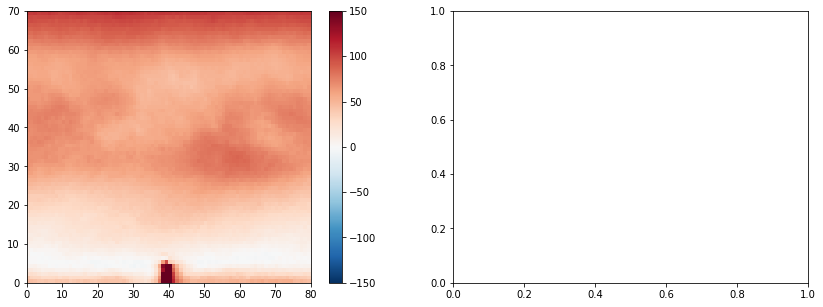

In [125]:
_,ax=plt.subplots(1,2,figsize=(14,5))
plot_2dvar(-test_oldmt_meant.SWDNB-test_oldmt_meant.LWDNB+test_oldmt_meant.SWUPB+test_oldmt_meant.LWUPB+test_oldmt_meant.HFX+test_oldmt_meant.LH,ax[0],scale=150.)
#plot_2dvar(-test_ft_meant.SWDNB-test_ft_meant.LWDNB+test_ft_meant.SWUPB+test_ft_meant.LWUPB+test_ft_meant.HFX+test_ft_meant.LH,ax[1])


# USGS w/ 65 vertical levels vs USGS w/ 39 vertical levels

In [152]:
usgs65 = xr.open_mfdataset(sorted(glob.glob("/global/cscratch1/sd/qnicolas/WRF/USGS_65_100_2/wrfout_d01_1970-*"))[5:16],combine="nested",concat_dim="Time")
usgs39 = xr.open_mfdataset(sorted(glob.glob("/global/cscratch1/sd/qnicolas/WRF/USGS_39_100/wrfout_d01_1970-*"))[5:16],combine="nested",concat_dim="Time")
usgs39180 = xr.open_mfdataset(sorted(glob.glob("/global/cscratch1/sd/qnicolas/WRF/USGS_39_180/wrfout_d01_1970-*"))[5:16],combine="nested",concat_dim="Time")

In [153]:
test_aq=xr.open_mfdataset(sorted(glob.glob("/global/cscratch1/sd/qnicolas/wrfdata/saved/new.wrf.crosseq.aquaplanet.100km.300d/wrfout_d01_1970-*"))[5:16],combine="nested",concat_dim="Time")


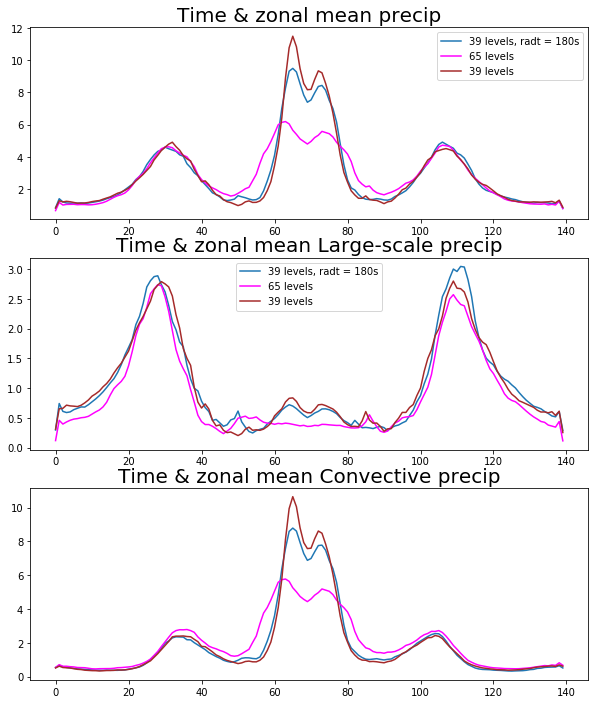

In [202]:
#RAINFALL
def extract_rains(ds):
    rainc=ds.RAINC.diff('Time').mean("Time")*4
    rainnc=ds.RAINNC.diff('Time').mean("Time")*4
    return rainc,rainnc,rainc+rainnc
rainc65,rainnc65,rain65 = extract_rains(usgs65)
rainc39,rainnc39,rain39 = extract_rains(usgs39)
rainc39180,rainnc39180,rain39180 = extract_rains(usgs39180)

fig, ax = plt.subplots(3,1,figsize=(10,3*4))
ax[0].plot(rain39180.south_north,rain39180.mean(["west_east"]),  label="39 levels, radt = 180s")
ax[1].plot(rain39180.south_north,rainnc39180.mean(["west_east"]),label="39 levels, radt = 180s")
ax[2].plot(rain39180.south_north,rainc39180.mean(["west_east"]), label="39 levels, radt = 180s")

ax[0].plot(rain65.south_north,rain65.mean(["west_east"]),label="65 levels",color='magenta')
ax[1].plot(rain65.south_north,rainnc65.mean(["west_east"]),label="65 levels",color='magenta')
ax[2].plot(rain65.south_north,rainc65.mean(["west_east"]),label="65 levels",color='magenta')

ax[0].plot(rain39.south_north,rain39.mean(["west_east"]),label="39 levels",color='brown')
ax[1].plot(rain39.south_north,rainnc39.mean(["west_east"]),label="39 levels",color='brown')
ax[2].plot(rain39.south_north,rainc39.mean(["west_east"]),label="39 levels",color='brown')
    
ax[0].set_title("Time & zonal mean precip",fontsize=20)
ax[1].set_title("Time & zonal mean Large-scale precip",fontsize=20)
ax[2].set_title("Time & zonal mean Convective precip",fontsize=20)

for a in ax[:-1] :a.legend()

Text(0.5, 1.0, 'Time & zonal mean upward surface energy budget')

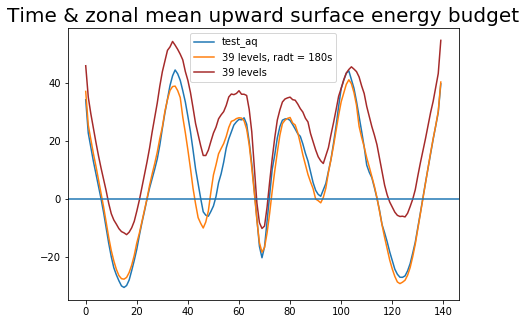

In [206]:
# Net upward surface energy budget
def upE_budget(ds):
    dsmean=ds.mean(["west_east",'Time'])
    return -dsmean.SWDNB-dsmean.LWDNB+dsmean.SWUPB+dsmean.LWUPB+dsmean.HFX+dsmean.LH

_,ax=plt.subplots(1,1,figsize=(7,5))
ax.plot(upE_budget(test_aq),label="test_aq")
ax.plot(upE_budget(usgs39180),label="39 levels, radt = 180s")
#ax.plot(upE_budget(usgs65),label="65 levels",color='magenta')
ax.plot(upE_budget(usgs39),label="39 levels",color='brown')
ax.legend()
ax.axhline(0.)
ax.set_title("Time & zonal mean upward surface energy budget", fontsize=20)

In [205]:
print(1)

1


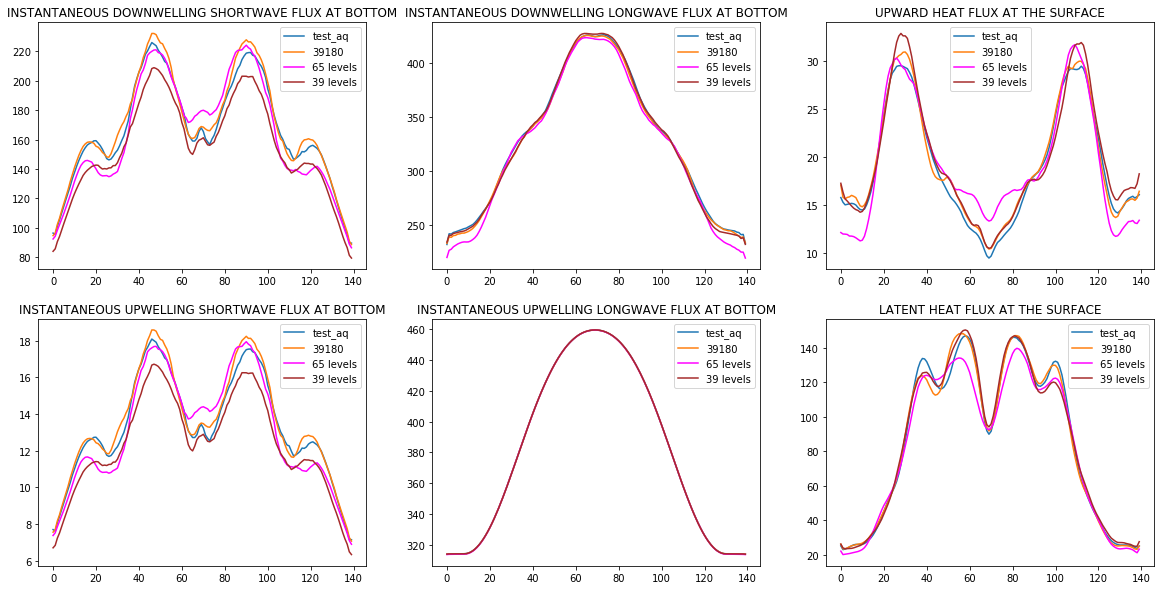

In [156]:
_,ax=plt.subplots(2,3,figsize=(20,10))
ax=ax.reshape(-1)
for i,var in enumerate(["SWDNB","LWDNB","HFX","SWUPB","LWUPB","LH"]):
    ax[i].plot(test_aq[var].mean(["west_east",'Time']),label="test_aq")
    ax[i].plot(usgs39180[var].mean(["west_east",'Time']),label="39180")
    ax[i].plot(usgs65[var].mean(["west_east",'Time']),label="65 levels",color='magenta')
    ax[i].plot(usgs39[var].mean(["west_east",'Time']),label="39 levels",color='brown')
    ax[i].legend()
    ax[i].set_title(test_aq[var].description)
    

Text(0.5, 1.0, 'Time mean, Zonal mean, vertical mean cloud fraction')

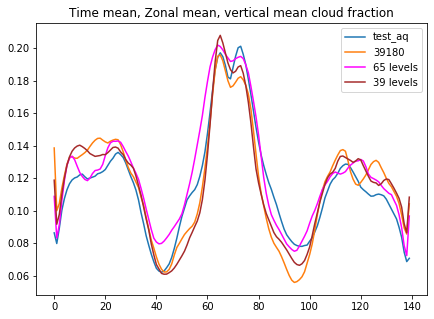

In [157]:
_,ax=plt.subplots(1,1,figsize=(7,5))
ax.plot(test_aq.CLDFRA.mean(['Time','bottom_top','west_east']),label="test_aq")
ax.plot(usgs39180.CLDFRA.mean(['Time','bottom_top','west_east']),label="39180")
ax.plot(usgs65.CLDFRA.mean(['Time','bottom_top','west_east']),label="65 levels",color='magenta')
ax.plot(usgs39.CLDFRA.mean(['Time','bottom_top','west_east']),label="39 levels",color='brown')
ax.legend()
ax.set_title("Time mean, Zonal mean, vertical mean cloud fraction")

In [211]:
def plot_2dvar_2(var,ax):
    c = ax.pcolormesh(np.array(var),cmap=plt.cm.RdBu_r)
    plt.colorbar(c,ax=ax)
    ax.set_title(var.name)

In [181]:
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import SkewT
from metpy.units import units
    

In [172]:
tropics_limit = 5
def mean_tropics(x):
    return x.sel(south_north=slice(70-tropics_limit,70+tropics_limit)).mean(['west_east','south_north'])

In [176]:
temp65 = mean_tropics((usgs65.T.mean('Time')+300)*(usgs65.P_HYD.mean('Time')/1e5)**0.286)
temp39 = mean_tropics((usgs39.T.mean('Time')+300)*(usgs39.P_HYD.mean('Time')/1e5)**0.286)
qvap65 = mean_tropics(usgs65.QVAPOR.mean('Time'))
qvap39 = mean_tropics(usgs39.QVAPOR.mean('Time'))
p65 = mean_tropics(usgs65.P_HYD.mean('Time'))
p39 = mean_tropics(usgs39.P_HYD.mean('Time'))

In [174]:
np.array(temp65)

array([296.09756, 293.47952, 291.23178, 289.56906, 288.20978, 286.90604,
       285.49747, 284.05383, 282.5869 , 281.07184, 279.51602, 277.91913,
       276.41537, 275.02905, 273.69196, 272.37057, 271.02148, 269.67673,
       268.31485, 266.9129 , 265.4374 , 263.86578, 262.1867 , 260.41156,
       258.56454, 256.66846, 254.7419 , 252.79686, 250.84073, 248.87773,
       246.91234, 244.94687, 242.9827 , 241.0198 , 239.05785, 237.09717,
       235.13847, 233.18138, 231.22539, 229.27063, 227.31703, 225.36504,
       223.41774, 221.47565, 219.53778, 217.60002, 215.65962, 213.7151 ,
       211.767  , 209.8175 , 207.8693 , 205.92334, 203.97719, 202.03043,
       200.0826 , 198.13516, 196.19153, 194.25797, 192.34387, 190.46255,
       188.6416 , 186.95375, 185.562  , 186.77351], dtype=float32)

In [180]:
P65 = np.array(p65)* units.Pa
T65 = np.array(temp65) * units.degK
Q65 = np.array(qvap65)
Td65 = mpcalc.dewpoint_from_specific_humidity(Q65,T65,P65)

P39 = np.array(p39)* units.Pa
T39 = np.array(temp39) * units.degK
Q39 = np.array(qvap39)
Td39 = mpcalc.dewpoint_from_specific_humidity(Q39,T39,P39)

Text(0.5, 0.98, 'Time & space mean soundings for the tropical atmosphere')

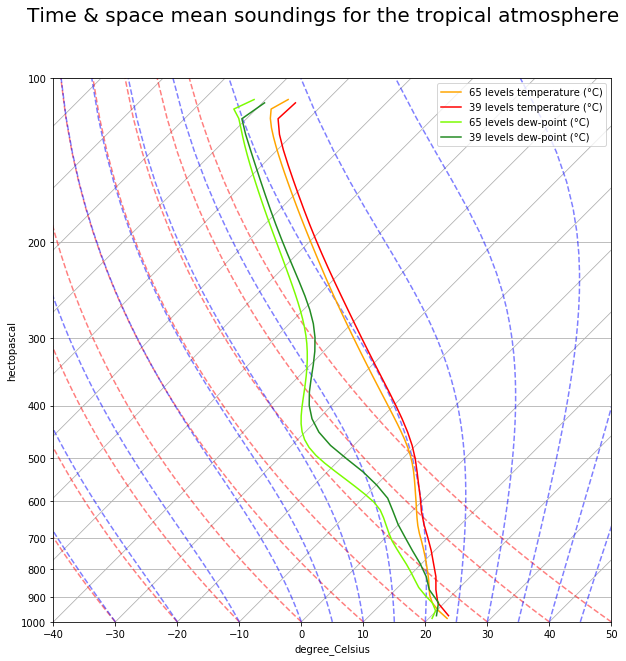

In [197]:
fig = plt.figure(figsize=(10,10))
skew = SkewT(fig, rotation=45)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot.
skew.plot(P65, T65, color='orange',label='65 levels temperature (°C)')
skew.plot(P39, T39, color='red'   ,label='39 levels temperature (°C)')

skew.plot(P65, Td65, color='lawngreen',label='65 levels dew-point (°C)')
skew.plot(P39, Td39, color='forestgreen'   ,label='39 levels dew-point (°C)')


## Calculate full parcel profile and add to plot as black line
#prof65 = mpcalc.parcel_profile(P65, T65[0], Td65[0]).to('degC')
#skew.plot(P65, prof65, color='grey', linewidth=2)
#skew.shade_cape(P65, T65, prof65,color="orange")
#print("65 levels :",mpcalc.cape_cin(P65, T65, Td65,prof65)[0])
#
## Calculate full parcel profile and add to plot as black line
#prof39 = mpcalc.parcel_profile(P39, T39[0], Td39[0]).to('degC')
#skew.plot(P39, prof39, 'k', linewidth=2)
#skew.shade_cape(P39, T39, prof39)
#print("39 levels :",mpcalc.cape_cin(P39, T39, Td39,prof39)[0])

skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 50)

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
#skew.plot_mixing_lines()

## Show the plot
plt.legend()
fig.suptitle("Time & space mean soundings for the tropical atmosphere",fontsize=20)



In [178]:
Td65

array([ 20.52933   ,  19.84257   ,  18.099752  ,  15.66443   ,
        13.404384  ,  11.5084505 ,   9.636175  ,   7.6844487 ,
         5.649353  ,   3.6202297 ,   1.6376047 ,  -0.13265374,
        -1.8226559 ,  -3.5074713 ,  -5.3065767 ,  -7.5447073 ,
       -10.237085  , -13.086693  , -15.999613  , -18.93546   ,
       -21.817114  , -24.514053  , -26.879541  , -28.879526  ,
       -30.560658  , -31.993187  , -33.262264  , -34.429832  ,
       -35.54443   , -36.644005  , -37.75649   , -38.898968  ,
       -40.08895   , -41.334625  , -42.64575   , -44.03172   ,
       -45.501385  , -47.05171   , -48.673748  , -50.356926  ,
       -52.090454  , -53.866558  , -55.675278  , -57.50767   ,
       -59.35709   , -61.221268  , -63.098995  , -64.98854   ,
       -66.8869    , -68.7901    , -70.69374   , -72.59472   ,
       -74.49406   , -76.39158   , -78.28772   , -80.182014  ,
       -82.07126   , -83.94944   , -85.80926   , -87.64325   ,
       -89.45154   , -91.287384  , -93.60283   , -91.86812   ],
      dtype=float32) <Unit('degree_Celsius')>

# Impact of the radiation time step (50s vs 100s vs 180s)

In [4]:
def hemi_average(ds):
    return (ds.isel(south_north=range(69,-1,-1))+ds.isel(south_north=range(70,140)))/2

In [6]:
usgs39_50 = xr.open_mfdataset(sorted(glob.glob("/global/cscratch1/sd/qnicolas/WRF/tempold/USGS_39_50/wrfout_d01_1970-*"))[5:16],combine="nested",concat_dim="Time")
usgs39100 = xr.open_mfdataset(sorted(glob.glob("/global/cscratch1/sd/qnicolas/WRF/tempold/USGS_39_100/wrfout_d01_1970-*"))[5:16],combine="nested",concat_dim="Time")
usgs39180 = xr.open_mfdataset(sorted(glob.glob("/global/cscratch1/sd/qnicolas/WRF/tempold/USGS_39_180/wrfout_d01_1970-*"))[5:16],combine="nested",concat_dim="Time")

In [14]:
usgs39_50

<xarray.Dataset>
Dimensions:                (Time: 401, bottom_top: 38, bottom_top_stag: 39, seed_dim_stag: 2, soil_layers_stag: 5, south_north: 140, south_north_stag: 141, west_east: 80, west_east_stag: 81)
Coordinates:
    XLAT                   (Time, south_north, west_east) float32 dask.array<chunksize=(40, 140, 80), meta=np.ndarray>
    XLONG                  (Time, south_north, west_east) float32 dask.array<chunksize=(40, 140, 80), meta=np.ndarray>
    XTIME                  (Time) datetime64[ns] dask.array<chunksize=(40,), meta=np.ndarray>
    XLAT_U                 (Time, south_north, west_east_stag) float32 dask.array<chunksize=(40, 140, 81), meta=np.ndarray>
    XLONG_U                (Time, south_north, west_east_stag) float32 dask.array<chunksize=(40, 140, 81), meta=np.ndarray>
    XLAT_V                 (Time, south_north_stag, west_east) float32 dask.array<chunksize=(40, 141, 80), meta=np.ndarray>
    XLONG_V                (Time, south_north_stag, west_east) float32 dask.array<chunksize=(40, 141, 80), meta=np.ndarray>
Dimensions without coordinates: Time, bottom_top, bottom_top_stag, seed_dim_stag, soil_layers_stag, south_north, south_north_stag, west_east, west_east_stag
Data variables:
    Times                  (Time) |S19 dask.array<chunksize=(40,), meta=np.ndarray>
    LU_INDEX               (Time, south_north, west_east) float32 dask.array<chunksize=(40, 140, 80), meta=np.ndarray>
    ZNU                    (Time, bottom_top) float32 dask.array<chunksize=(40, 38), meta=np.ndarray>
    ZNW                    (Time, bottom_top_stag) float32 dask.array<chunksize=(40, 39), meta=np.ndarray>
    ZS                     (Time, soil_layers_stag) float32 dask.array<chunksize=(40, 5), meta=np.ndarray>
    DZS                    (Time, soil_layers_stag) float32 dask.array<chunksize=(40, 5), meta=np.ndarray>
    VAR_SSO                (Time, south_north, west_east) float32 dask.array<chunksize=(40, 140, 80), meta=np.ndarray>
    U                      (Time, bottom_top, south_north, west_east_stag) float32 dask.array<chunksize=(40, 38, 140, 81), meta=np.ndarray>
    V                      (Time, bottom_top, south_north_stag, west_east) float32 dask.array<chunksize=(40, 38, 141, 80), meta=np.ndarray>
    W                      (Time, bottom_top_stag, south_north, west_east) float32 dask.array<chunksize=(40, 39, 140, 80), meta=np.ndarray>
    PH                     (Time, bottom_top_stag, south_north, west_east) float32 dask.array<chunksize=(40, 39, 140, 80), meta=np.ndarray>
    PHB                    (Time, bottom_top_stag, south_north, west_east) float32 dask.array<chunksize=(40, 39, 140, 80), meta=np.ndarray>
    T                      (Time, bottom_top, south_north, west_east) float32 dask.array<chunksize=(40, 38, 140, 80), meta=np.ndarray>
    THM                    (Time, bottom_top, south_north, west_east) float32 dask.array<chunksize=(40, 38, 140, 80), meta=np.ndarray>
    HFX_FORCE              (Time) float32 dask.array<chunksize=(40,), meta=np.ndarray>
    LH_FORCE               (Time) float32 dask.array<chunksize=(40,), meta=np.ndarray>
    TSK_FORCE              (Time) float32 dask.array<chunksize=(40,), meta=np.ndarray>
    HFX_FORCE_TEND         (Time) float32 dask.array<chunksize=(40,), meta=np.ndarray>
    LH_FORCE_TEND          (Time) float32 dask.array<chunksize=(40,), meta=np.ndarray>
    TSK_FORCE_TEND         (Time) float32 dask.array<chunksize=(40,), meta=np.ndarray>
    MU                     (Time, south_north, west_east) float32 dask.array<chunksize=(40, 140, 80), meta=np.ndarray>
    MUB                    (Time, south_north, west_east) float32 dask.array<chunksize=(40, 140, 80), meta=np.ndarray>
    NEST_POS               (Time, south_north, west_east) float32 dask.array<chunksize=(40, 140, 80), meta=np.ndarray>
    P                      (Time, bottom_top, south_north, west_east) float32 dask.array<chunksize=(40, 38, 140, 80), meta=np.ndarray>
    PB                     (Time, bottom_top, sou

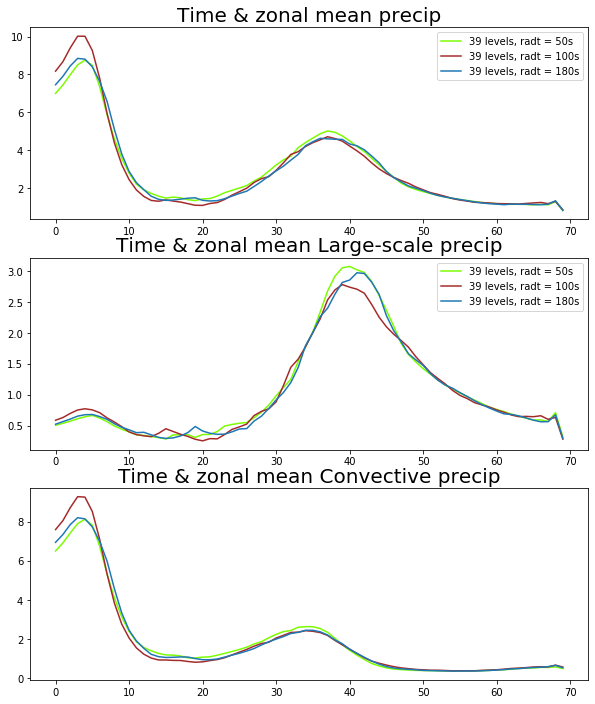

In [219]:
#RAINFALL
def extract_rains(ds):
    rainc=ds.RAINC.diff('Time').mean("Time")*4
    rainnc=ds.RAINNC.diff('Time').mean("Time")*4
    return rainc,rainnc,rainc+rainnc
rainc39_50,rainnc39_50,rain39_50 = extract_rains(usgs39_50)
rainc39100,rainnc39100,rain39100 = extract_rains(usgs39100)
rainc39180,rainnc39180,rain39180 = extract_rains(usgs39180)

fig, ax = plt.subplots(3,1,figsize=(10,3*4))
ax[0].plot(range(70),hemi_average(rain39_50.mean(["west_east"])  ),  label="39 levels, radt = 50s", color="lawngreen")
ax[1].plot(range(70),hemi_average(rainnc39_50.mean(["west_east"])),label="39 levels, radt = 50s",   color="lawngreen")
ax[2].plot(range(70),hemi_average(rainc39_50.mean(["west_east"]) ), label="39 levels, radt = 50s",  color="lawngreen")

ax[0].plot(range(70),hemi_average(rain39100.mean(["west_east"])  ),  label="39 levels, radt = 100s",color="brown")
ax[1].plot(range(70),hemi_average(rainnc39100.mean(["west_east"])),label="39 levels, radt = 100s",color="brown")
ax[2].plot(range(70),hemi_average(rainc39100.mean(["west_east"]) ), label="39 levels, radt = 100s",color="brown")

ax[0].plot(range(70),hemi_average(rain39180.mean(["west_east"])  ),  label="39 levels, radt = 180s")
ax[1].plot(range(70),hemi_average(rainnc39180.mean(["west_east"])),label="39 levels, radt = 180s")
ax[2].plot(range(70),hemi_average(rainc39180.mean(["west_east"]) ), label="39 levels, radt = 180s")
    
ax[0].set_title("Time & zonal mean precip",fontsize=20)
ax[1].set_title("Time & zonal mean Large-scale precip",fontsize=20)
ax[2].set_title("Time & zonal mean Convective precip",fontsize=20)

for a in ax[:-1] :a.legend()

In [16]:
def plot_withstd(ds,ax,label,color):
    #dszm = ds.mean("west_east")
    dsztm = ds
    #dsztm = dszm.mean('Time')
    #dszmstd = dszm.chunk({"Time":-1}).rolling(Time=40, center=True).mean().dropna("Time").std('Time')
    ax.plot(dsztm,label=label ,color=color)
    #ax.fill_between(range(0,140), dsztm-dszmstd, dsztm+dszmstd,
    #             facecolor=color,
    #             color=color,   
    #             alpha=0.2)  

Text(0.5, 1.0, 'Time & zonal mean upward surface energy budget')

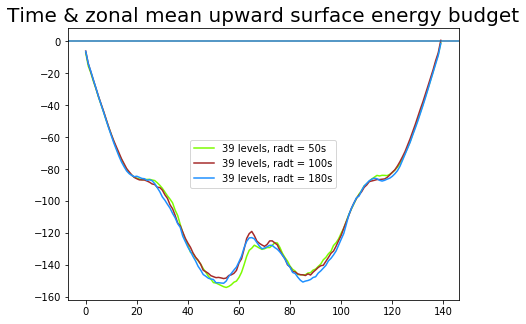

In [17]:
# Net upward surface energy budget
def upE_budget(ds):
    dsmean=ds
    return -dsmean.ACSWDNB-dsmean.ACLWDNB+dsmean.ACSWUPB+dsmean.ACLWUPB+dsmean.ACHFX+dsmean.ACLHF

_,ax=plt.subplots(1,1,figsize=(7,5))
plot_withstd((upE_budget(usgs39_50.isel(Time=-1).mean('west_east')/(100*86400))-upE_budget(usgs39_50.isel(Time=0).mean('west_east')/(100*86400))),ax,"39 levels, radt = 50s" ,"lawngreen")
plot_withstd((upE_budget(usgs39100.isel(Time=-1).mean('west_east')/(100*86400))-upE_budget(usgs39100.isel(Time=0).mean('west_east')/(100*86400))),ax,"39 levels, radt = 100s","brown")
plot_withstd((upE_budget(usgs39180.isel(Time=-1).mean('west_east')/(100*86400))-upE_budget(usgs39180.isel(Time=0).mean('west_east')/(100*86400))),ax,"39 levels, radt = 180s","dodgerblue")
ax.legend()
ax.axhline(0.)
ax.set_title("Time & zonal mean upward surface energy budget", fontsize=20)


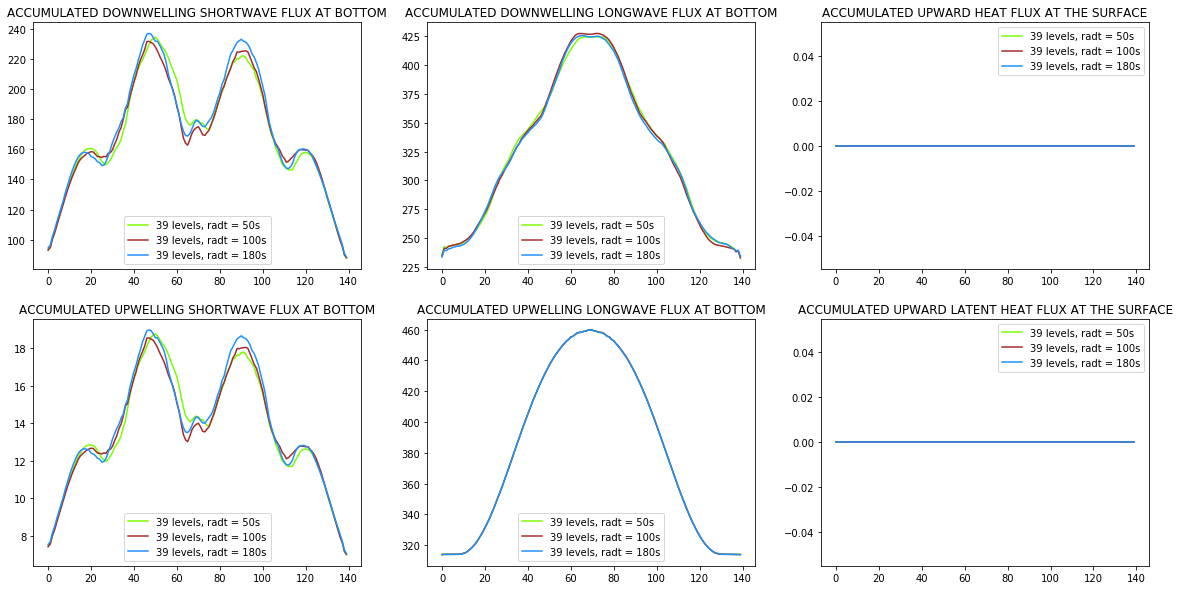

In [19]:
_,ax=plt.subplots(2,3,figsize=(20,10))
ax=ax.reshape(-1)
for i,var in enumerate(["ACSWDNB","ACLWDNB","ACHFX","ACSWUPB","ACLWUPB","ACLHF"]):
    plot_withstd(usgs39_50[var].isel(Time=-1).mean('west_east')/(100*86400)-usgs39_50[var].isel(Time=0).mean('west_east')/(100*86400),ax[i],"39 levels, radt = 50s" ,"lawngreen")
    plot_withstd(usgs39100[var].isel(Time=-1).mean('west_east')/(100*86400)-usgs39100[var].isel(Time=0).mean('west_east')/(100*86400),ax[i],"39 levels, radt = 100s","brown")
    plot_withstd(usgs39180[var].isel(Time=-1).mean('west_east')/(100*86400)-usgs39180[var].isel(Time=0).mean('west_east')/(100*86400),ax[i],"39 levels, radt = 180s","dodgerblue")
    ax[i].legend()
    ax[i].set_title(usgs39_50[var].description)

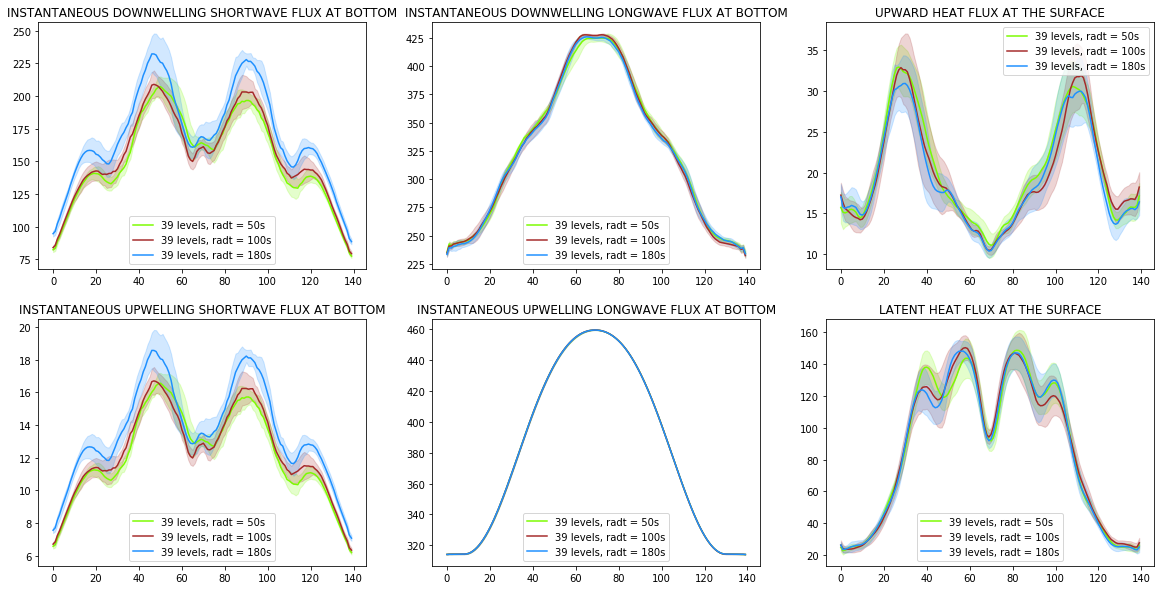

In [230]:


    

_,ax=plt.subplots(2,3,figsize=(20,10))
ax=ax.reshape(-1)
for i,var in enumerate(["SWDNB","LWDNB","HFX","SWUPB","LWUPB","LH"]):
    plot_withstd(usgs39_50[var],ax[i],"39 levels, radt = 50s" ,"lawngreen")
    plot_withstd(usgs39100[var],ax[i],"39 levels, radt = 100s","brown")
    plot_withstd(usgs39180[var],ax[i],"39 levels, radt = 180s","dodgerblue")
    ax[i].legend()
    ax[i].set_title(test_aq[var].description)

# New wrfinput

In [4]:
wrfinput=xr.open_dataset("/global/cscratch1/sd/qnicolas/WRF/WRFV4_bp_crosseq/test/em_beta_plane/wrfinput_d01")

In [ ]:
wrfinput=xr.open_dataset("/global/cscratch1/sd/qnicolas/wrfdata/saved/new.wrf.50x100.mountain.100km.300d/wrfinput_d01")

In [5]:
def plot_2dvar(var):
    fig, ax = plt.subplots(1,1,figsize=(7,6))
    var.isel(Time=0).plot(ax=ax)
    ax.set_title(var.description,fontsize=20)

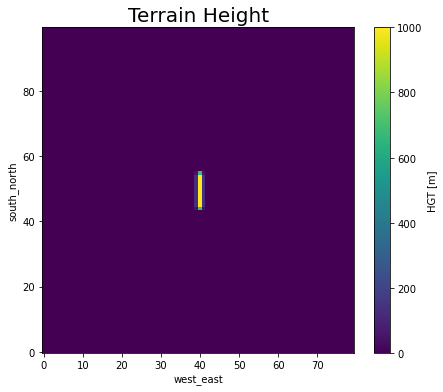

In [6]:
plot_2dvar(wrfinput.HGT)


In [52]:
hgt=np.array(wrfinput.HGT.isel(Time=0,west_east=25))
lat=np.array(wrfinput.XLAT.isel(Time=0,west_east=25))

In [53]:
l=43
print(hgt[l:-l])
print(lat[l:-l])

[   0.      677.3024 1000.     1000.     1000.     1000.     1000.
 1000.     1000.     1000.     1000.     1000.      677.3024    0.    ]
[-6.5 -5.5 -4.5 -3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5]


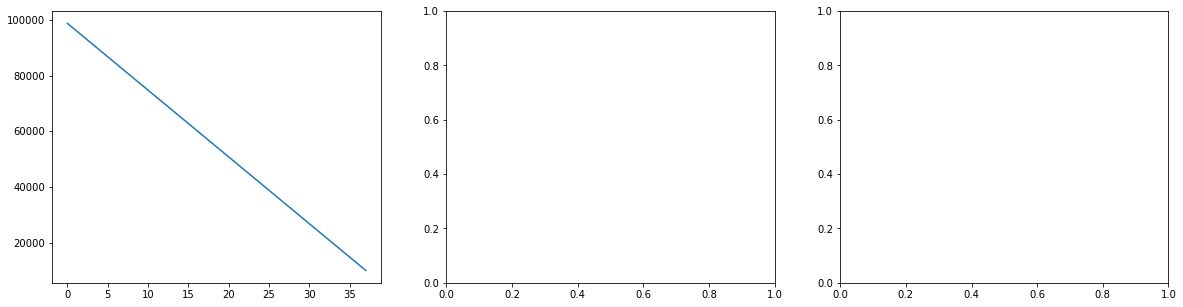

In [37]:
wrfinputplevs=wrfinput.PB.isel(Time=-1).isel(south_north=slice(69-40,70+40)).mean(['south_north','west_east'])
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].plot(wrfinput.bottom_top,wrfinputplevs)

    
    

# Equally spaced eta levels vs stretched

In [11]:
%%time
def extract_wrfout(simulation_path):
    files=sorted(glob.glob(simulation_path+'wrfout_d01_197*'))
    return xr.open_mfdataset(files,combine='nested',concat_dim='Time',parallel=True)

Acontwrf = extract_wrfout("/global/cscratch1/sd/qnicolas/wrfdata/saved/new.wrf.crosseq.aquaplanet.100km.300d/")
Anlevwrf = extract_wrfout("/global/cscratch1/sd/qnicolas/wrfdata/saved/newlevs.wrf.crosseq.aquaplanet.100km.100d/")


CPU times: user 13.1 s, sys: 4.14 s, total: 17.2 s
Wall time: 12.9 s


In [22]:
def compute_rain(wrfvars):
    rainc  = ( wrfvars.RAINC.isel(Time=400) -  wrfvars.RAINC.isel(Time=200)).mean("west_east")/(200) *4
    rainnc = (wrfvars.RAINNC.isel(Time=400) - wrfvars.RAINNC.isel(Time=200)).mean("west_east")/(200) *4
    return rainc + rainnc
Acontrain = compute_rain(Acontwrf)
Anlevrain = compute_rain(Anlevwrf)

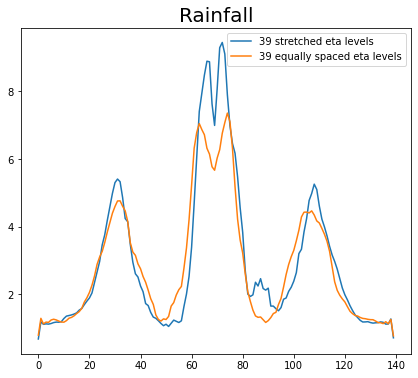

In [24]:
fig, ax = plt.subplots(1,1,figsize=(7,6))
ax.set_title("Rainfall",fontsize=20)
ax.plot(Acontrain.south_north,Acontrain,label="39 stretched eta levels")
ax.plot(Anlevrain.south_north,Anlevrain,label="39 equally spaced eta levels")
ax.legend()
ax.set_label("mm/day")


Text(0, 0.5, 'Pressure (Pa)')

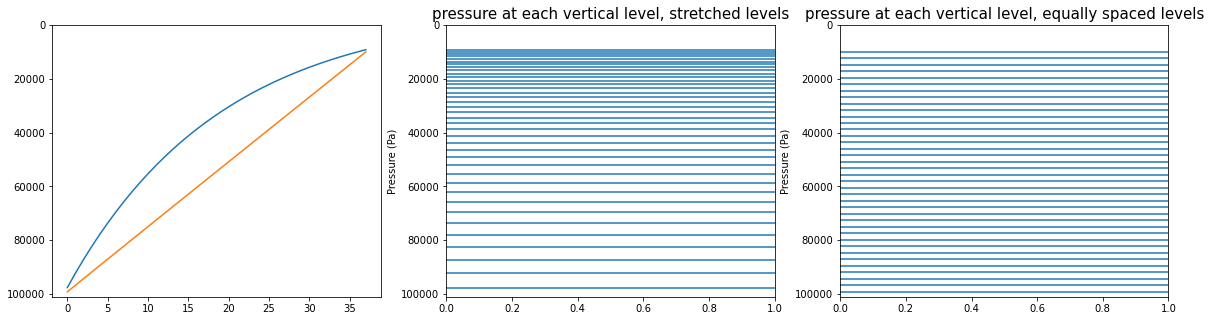

In [20]:
Acontplevs=Acontwrf.P_HYD.isel(Time=-1).isel(south_north=slice(69-40,70+40)).mean(['south_north','west_east']).persist()
Anlevplevs=Anlevwrf.P_HYD.isel(Time=-1).isel(south_north=slice(69-40,70+40)).mean(['south_north','west_east']).persist()
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].plot(Acontplevs.bottom_top,Acontplevs)
ax[0].plot(Anlevplevs.bottom_top,Anlevplevs)
ax[0].set_ylim((101000,0))
ax[1].set_ylim((101000,0))
ax[2].set_ylim((101000,0))
for i in range(len(Acontplevs)):
    ax[1].axhline(Acontplevs[i])
    ax[2].axhline(Anlevplevs[i])

ax[1].set_title("pressure at each vertical level, stretched levels",fontsize=15)
ax[1].set_ylabel("Pressure (Pa)")

ax[2].set_title("pressure at each vertical level, equally spaced levels",fontsize=15)
ax[2].set_ylabel("Pressure (Pa)")
    
    

# Check wrfinput - bis

In [5]:
wrfinput1 = xr.open_dataset("/global/cscratch1/sd/qnicolas/wrfdata/saved/new.wrf.small.aquaplanet.100km.300d/wrfinput_d01"    )
wrfinput2 = xr.open_dataset("/global/cscratch1/sd/qnicolas/wrfdata/saved/newinit.wrf.small.aquaplanet.100km.100d/wrfinput_d01")


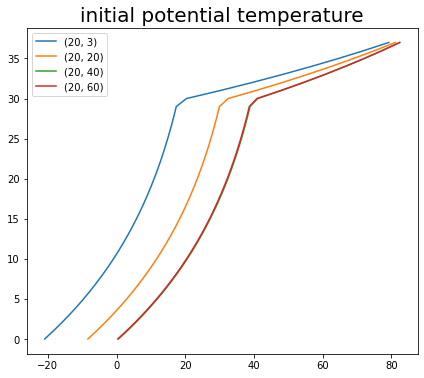

In [7]:
plot_randomvvars(wrfinput1.T_INIT)

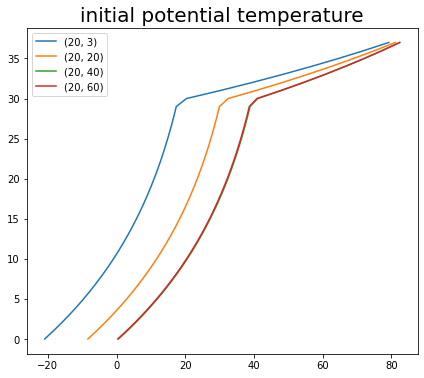

In [8]:
plot_randomvvars(wrfinput2.T_INIT)

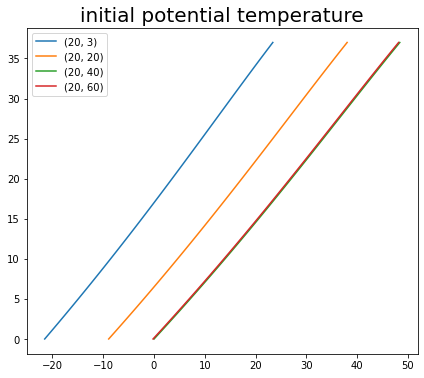

In [4]:
wrfinput = xr.open_dataset("/global/cscratch1/sd/qnicolas/WRF/WRFV4_aq_crosseq/test/em_beta_plane/wrfinput_d01")
plot_randomvvars(wrfinput.T_INIT)

22.356421878245897

In [26]:
T=265
p=0.5e3
g=9.81
qvs = qsat(T,p)
CC=0.07
L = 2.25e6
R = 287.
Rv = 461.
cp=1004.

Gamma = g*(1+L*qvs/(R*T))/(cp+qvs*L**2/(Rv*T**2))
dlnGammadT = (1/(g*(1+L*qvs/(R*T))) * 
              (-g*L*qvs/(R*T**2) +
               L*g/(R*T)*qvs*CC +
               Gamma*(2*qvs*L**2/(Rv*T**3) - qvs*CC*L**2/(Rv*T**2))
              )
             )

In [27]:
dlnGammadT

-0.016862901956367124